# Lecture 16 - Uncertainty Propagation: Polynomial Chaos I

## Objectives

+ Define the Hilbert space of square integrable functions.
+ Define orthogonal polynomials (polynomial chaos) as a basis of the aforementioned Hilbert space.
+ Demonstrate standard orthogonal polynomials (Hermite, Legendre, etc.).
+ Demonstrate basic properties of polynomial expansions.
+ Propagate uncertainty through an initial value problem using intrusive polynomial chaos.

## Readings

+ These notes.

**NOTE**
+ If you are in class, skip the section on Hilbert spaces. Move directly to the examples.

In [5]:
import numpy as np
import math
import scipy.stats as st
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')
import orthpol  # This is the package we will use to construct orthogonal polynomials

## The Hilbert Space of Square Integrable Functions

### Space of Square Integrable Functions
Let $X$ be a random vector with probability density $p(x)$.
Consider the space of all square integrable functions of $X$:
$$
\mathcal{F}\equiv \mathcal{F}_d = \left\{f:\mathbb{R}^d\rightarrow\mathbb{R}\;\mbox{such that}\;\mathbb{E}_p\left[f^2(X)\right]<\infty\right\}.
$$

It is easy to see that $\mathcal{F}$ is a *vector space* since for any $f,g\in\mathcal{F}$ and any $\mu,\lambda\in\mathbb{R}$, we have:
$$
\mu f + \lambda g \in \mathcal{F}.
$$

Now define the function:
$$
\langle\cdot,\cdot\rangle: \mathbb{F}\times \mathbb{F}\rightarrow\mathbb{R},
$$
by
$$
\langle f, g\rangle := \mathbb{E}_p\left[f(X)g(X)\right] = \int f(x)g(x)p(x)dx.
$$
Again, it is easy to see that $\langle\cdot,\cdot\rangle$ defines an *inner product*, i.e., that for any $f, g, h\in\mathcal{F}$ and any $\mu\in\mathbb{R}$, we have:
$$
\langle f, f \rangle \ge 0,
$$
$$
\langle f, g \rangle = \langle g, f \rangle,
$$
$$
\langle \mu f, g\rangle = \mu \langle f, g\rangle,
$$
$$
\langle f, g + h\rangle = \langle f, g\rangle + \langle f, h\rangle.
$$
The vector space $\mathcal{F}$ equipped with the inner product $\langle\cdot,\cdot\rangle$ is an *inner product* space.

### Defining a Norm from an Inner Product
A norm $\parallel\cdot\parallel$ measures the "magnitude" of an element of a vector space.
The norm satisfies the following formulas for any $f\in\mathcal{F}$ and $\mu\in\mathbb{R}$:
$$
\parallel f\parallel \ge 0,
$$
$$
\parallel f\parallel = 0\Rightarrow f = 0,
$$
and
$$
\parallel \mu f\parallel = |\mu|\parallel f\parallel.
$$
Using the dot product one can define a *norm* over $\mathcal{F}$:
$$
\parallel f \parallel := \langle f, f\rangle^{\frac{1}{2}} = \left\{\int f^2(x)p(x)dx\right\}^{\frac{1}{2}}.
$$


### Defining a Metric from a Norm
A metric $d(\cdot,\cdot)$ defines "distances" between two elements of a vector space.
It is essential for defining convergence of sequences in the vector space.
A metric satisfies the following formulas for any $f,g,h\in\mathcal{F}$:
$$
d(f,g) \ge 0,
$$
$$
d(f,g) = 0 \Rightarrow f = g,
$$
$$
d(g,f) = d(f,g),
$$
and
$$
d(f,g+h) \le d(f,g) + d(g,h).
$$
If you have a norm, you can define a metric:
$$
d(f,g) := \parallel f - g\parallel = \left\{\int\left(f(x)-g(x)\right)^2p(x)\right\}^{\frac{1}{2}}.
$$

### The Space of Square Integrable Functions is a Hilbert Space 
Now, it is not trivial to show this, but the space of integrable functions equipped with the inner product we defined above is *complete*.
In words, the space is complete if any sequence of functions that "looks like it converges" does indeed converge to a function that is inside the space.
Let $f_1,f_2,\dots\in\mathcal{F}$ be a sequence of functions that "looks like it converges".
Mathematically, a sequence looks like it converges if subsequent terms come arbitrarily close togther.
With symbols $\forall \epsilon > 0$, there exists a $n_0 = n_0(\epsilon)$ such that for all $n,m\ge n_0$ we have:
$$
d(f_n, f_m) < \epsilon.
$$
We call such a sequence a *Cauchy sequence*.
A space is complete if and only if every Cauchy sequence convergence to an $f\in\mathcal{F}$.
The space of square inegrable functions is complete, but the proof is not trivial.
A inner product space that is complete is called a *Hilbert space*.
So $\mathcal{F}$ is a Hilbert space.

### Orthonormal Basis
A subset of functions $\phi_1,\phi_2,\dots\in\mathcal{F}$ is called an *orthgonormal basis* if

1. The functions are orthogonal to each other:
$$
\langle f_i, f_j\rangle = \mathbb{E}_p[f_i(X)f_j(X)] = \int f_i(x)f_j(x)p(x)dx = 0,
$$
for all $i\not=j$.

2. The functions are normalized:
$$
\parallel f_i\parallel^2 = \langle f_i, f_i\rangle = \mathbb{E}_p\left[f_i^2(X)\right] = \int f_i^2(x)p(x)dx = 1.
$$

3. Any functions $f\in\mathcal{F}$ can be written as:
$$
f = \sum_{i=1}^\infty c_i \phi_i.
$$

Note the first two properties can be written in one equation using the Kronecker delta:
$$
\langle f_i, f_j\rangle = \delta_{ij} = \begin{cases}0,&i\not=j\\ 1,&\text{otherwise}.\end{cases}
$$

### Expanding a Vector in an Orthonormal Basis
There are some properties of Hilbert spaces that are extremely easy to derive.
Let $\phi_1,\phi_2,\dots$ be an orthonormal basis and $f\in\mathcal{F}$.
The function can be written as
$$
f = \sum_{i=1}^\infty c_i \phi_i,
$$
for some coefficients $c_1,c_2,\dots$.
How can we get these coefficients?
Using only the properties of the inner product we get: 
$$
\langle f, \phi_j\rangle = \left\langle\sum_{i=1}^\infty, \phi_j\right\rangle = \sum_{i=1}^\infty c_i\langle \phi_i, \phi_j\rangle = \sum_{i=1}^\infty c_i\delta_{ij} = c_j.
$$
Therefore, (one way) to get the coefficients is by performing the integral:
$$
c_j = \langle f, \phi_j\rangle = \int f(x)\phi_j(x)p(x)dx.
$$
This approach will give rise to the so-called "stochastic collocation methods" which we will study on Lecture 17.

### Parseval's Formula: First Connection to Uncertainty Propagation
Remember the definition of the norm of a function.
We will show that:
$$
\int f^2(x)p(x)dx = \parallel f\parallel^2 = \sum_{i=1}^\infty c_i^2.
$$
This is known as Parseval's formula.
It is useful in uncertainty propagation because it is a crucial part for the calculation of the variance.
The proof is trivial:
$$
\parallel f\parallel^2 = \langle f, f\rangle = \left\langle \sum_{i=1}^\infty c_i\phi, \sum_{j=1}^\infty c_j\phi_j\right\rangle = \sum_{i=1}^\infty\sum_{j=1}^\infty c_ic_j\langle \phi_i,\phi_j\rangle = \sum_{i=1}^\infty\sum_{j=1}^\infty c_ic_j\delta_{ij} = \sum_{i=1}^\infty|c_i|^2.
$$

## The Space of Square Integrable Scalar Functions and 1D Orthogonal Polynomials

Let $X$ be a random variable (a scalar variable) with probability density $p(x)$.
In this section, we will construct a polynomial orthonormal basis for the space of square integrable functions $f:\mathbb{R}\rightarrow \mathbb{R}$.
Let the underlying vector space be $\mathcal{F}_1$ with the previously defined inner product.

### Definition of 1D Polynomials
A *polynomial* of degree $\rho$ is a scalar function of a real variable:
$$
g(x;a) = a_0 + a_1 x + a_2 x^2 + \dots + a_\rho x^\rho,
$$
where $a = (a_0, a_1, \dots, a_\rho)$ are the coefficients of the polynomial.


### Orthonormal Polynomials
A set $\phi_1,\phi_2,\dots$ of 1D polynomials are *orthonormal polynomials* with respect to $p(x)$ if they form an orthonormal basis of the underlying Hilbert space.
In other words:

1. Each $\phi_i$ must be a polynomial:
$$
\phi_i(x) = a_{0i} + a_{1i}x + \dots + a_{\rho_i i}x^{\rho_i}.
$$

2. For any $i\not=j$ we have:
$$
\langle\phi_i, \phi_j\rangle = \mathbb{E}_p[\phi_i(X)\phi_j(X)] = \int_{-\infty}^\infty \phi_i(x)\phi_j(x)p(x)dx = 0.
$$

3. They are normalized:
$$
\parallel \phi_i\parallel^2 = \langle \phi_i,\phi_i\rangle = \int_{-\infty}^\infty \phi_i^2(x)p(x)dx = 1.
$$

For some weird reason the set of such polynomials are called "polynomial chaos."
You can call them orthonormal polynomials with respect to $p(x)$...

### Constructing Orthogonal Polynomials

The easiest way to construct orthogonal polynomials is to start from the monomials $1,x,x^2,\dots$ and apply the [Gram-Schmidt process](https://en.wikipedia.org/wiki/Gram–Schmidt_process) using the inner product we defined previously.
With this procedure, the first polynomial will always be the constant:
$$
\phi_1(x) = 1.
$$

Despite the fact that you can carry out the Gram-Schmidt process for many choices of $p(x)$, we will rely on the algorithms developed by [Walter Gautschi](https://www.cs.purdue.edu/homes/wxg/):

+ [Gautschi, W. (1994). Algorithm 726: ORTHPOL–a package of routines for generating orthogonal polynomials and Gauss-type quadrature rules. ACM Transactions on Mathematical Software (TOMS), 20(1), 21–62.](https://dl.acm.org/citation.cfm?id=174605).

He has developed a quite stable suite of algorithms for calculating these polynomials and he has implemented them in Fortran called [ORTHPOL](https://dl.acm.org/ft_gateway.cfm?id=174605&type=gz&path=%2F180000%2F174605%2Fsupp%2F726%2Egz&supp=1&dwn=1).
We will not worry about the details of these calculations or the representation of the polynomials because they are quite involved.
We will just use the Python interface to ORTHPOL, [py-orthpol](https://github.com/PredictiveScienceLab/uq-course), developed by Bilionis.

### Example 1: The Standard Normal and the Hermite Polynomials

Let $X\sim\mathcal{N}(0,1)$. The orthogonal polynomials in this case are known as the [Hermite polynomials](https://en.wikipedia.org/wiki/Hermite_polynomials).
They are known analytically.
The first few are:
$$
\begin{array}{ccc}
\phi_1(x) &=& 1,\\
\phi_2(x) &=& x,\\
\phi_3(x) &=& x^2 - 1,\\
\phi_4(x) &=& x^3 - 3x,\\
\phi_5(x) &=& x^4 - 6x^2 + 3.
\end{array}
$$

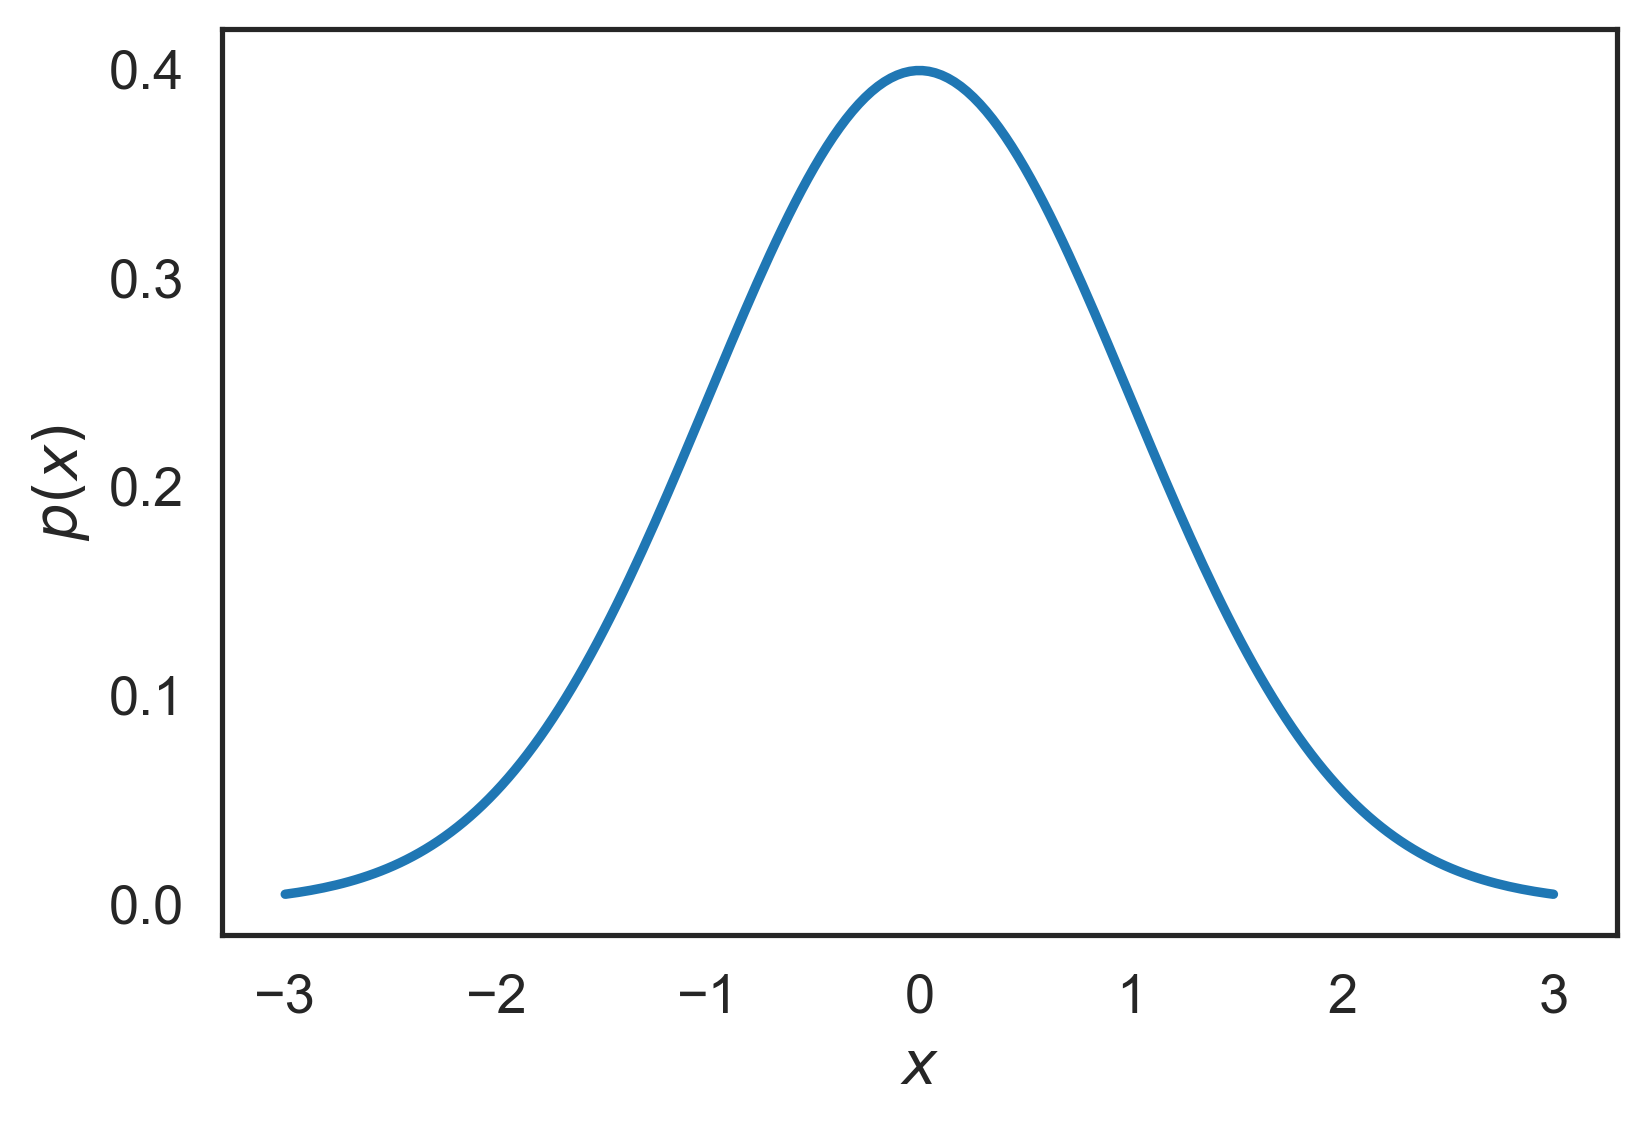

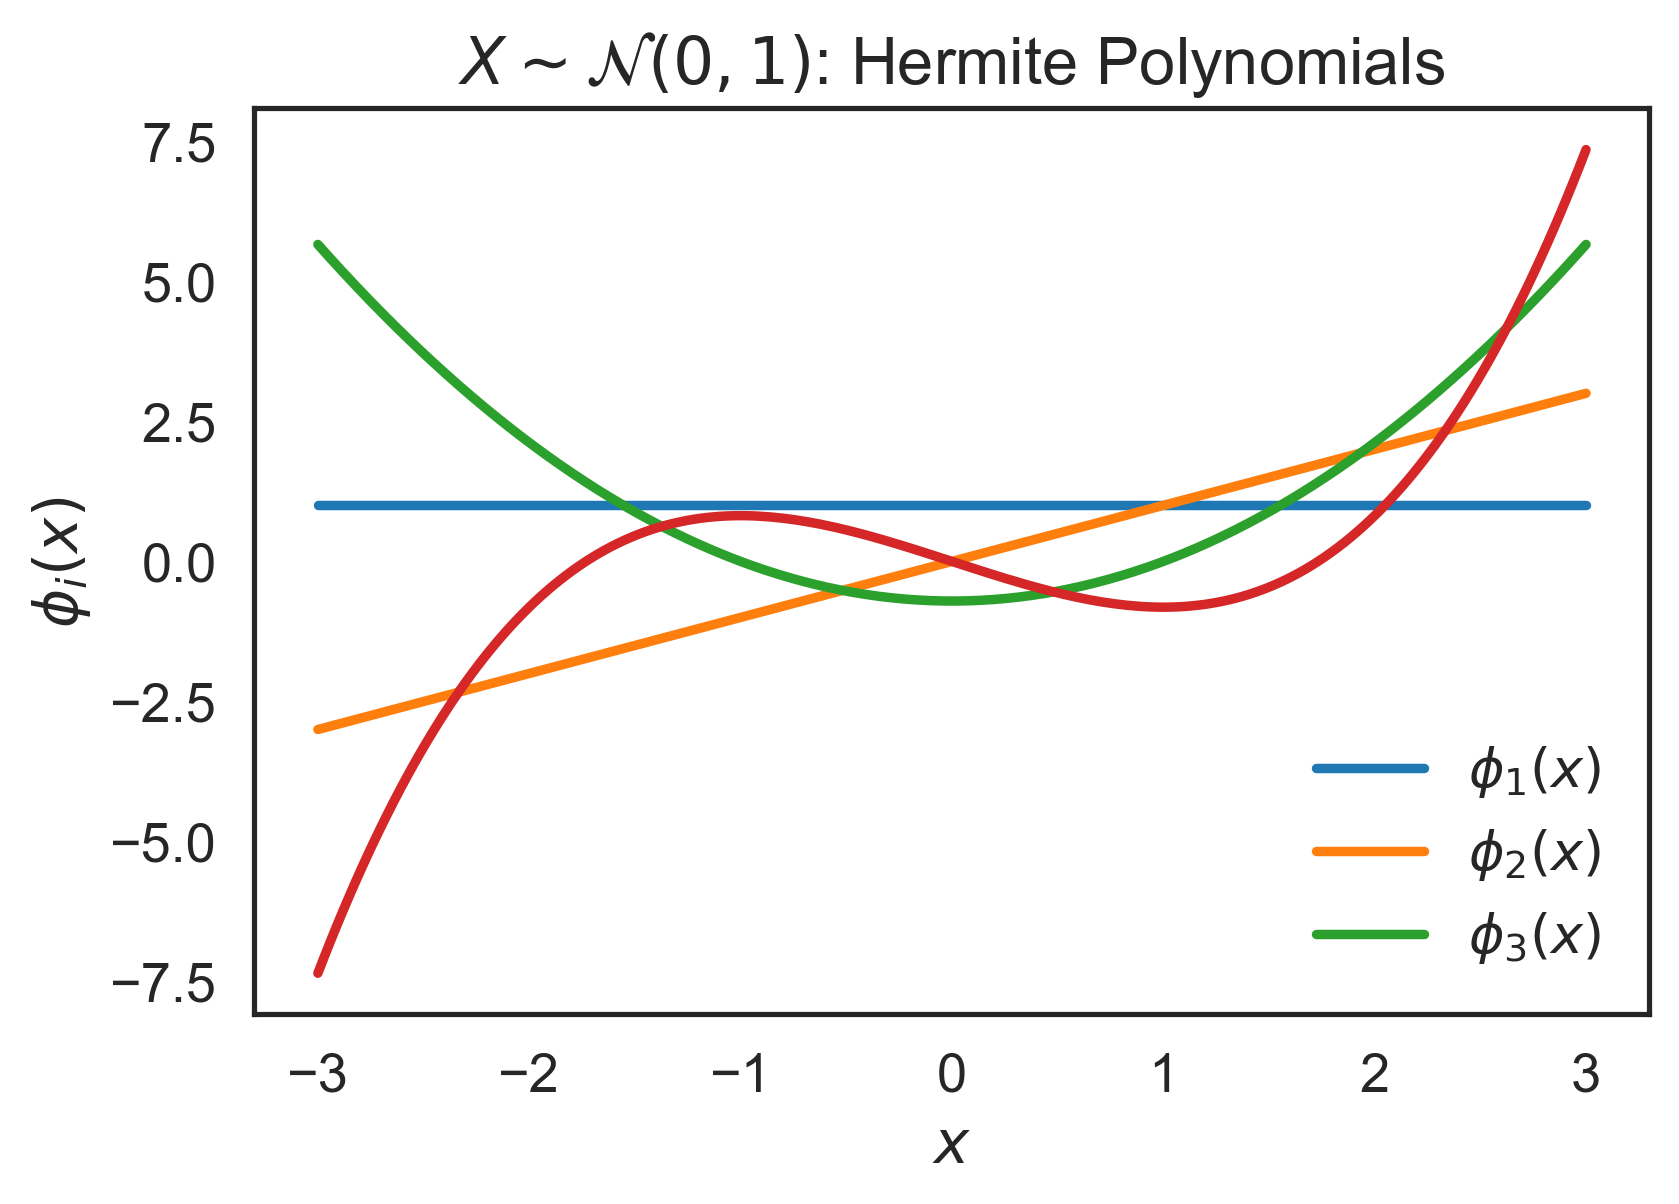

In [7]:
# The random variable you wish to consider
X = st.norm()
# The maximum polynomial degree you want
degree = 3
# Construct the orthogonal polynomials
Phi_set = orthpol.OrthogonalPolynomial(degree, X)

# Plot the probability density
fig, ax = plt.subplots()
x = np.linspace(-3, 3, 200)
ax.plot(x, X.pdf(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

# Plot them
fig, ax = plt.subplots()
# Evaluate the orhtogonal polynomials on all these x's
phi_x = Phi_set(x)    # 200 x (degree + 1)
# Plot each one of them
ax.plot(x, phi_x);
ax.set_xlabel('$x$')
ax.set_ylabel('$\phi_i(x)$')
ax.set_title('$X\sim\mathcal{N}(0,1)$: Hermite Polynomials')
plt.legend(['$\phi_{%d}(x)$' % i for i in range(1, degree + 1)], loc='best');

### Example 2: The Exponential and the Laguerre Polynomials

Let $X\sim\mathcal{E}(1)$. The orthogonal polynomials in this case are known as the [Laguerre polynomials](https://en.wikipedia.org/wiki/Laguerre_polynomials).
They are known analytically.
The first few are:
$$
\begin{array}{ccc}
\phi_1(x) &=& 1,\\
\phi_2(x) &=& -x + 1,\\
\phi_3(x) &=& \frac{1}{2}\left(x^2 - 4x + 2\right).
\end{array}
$$

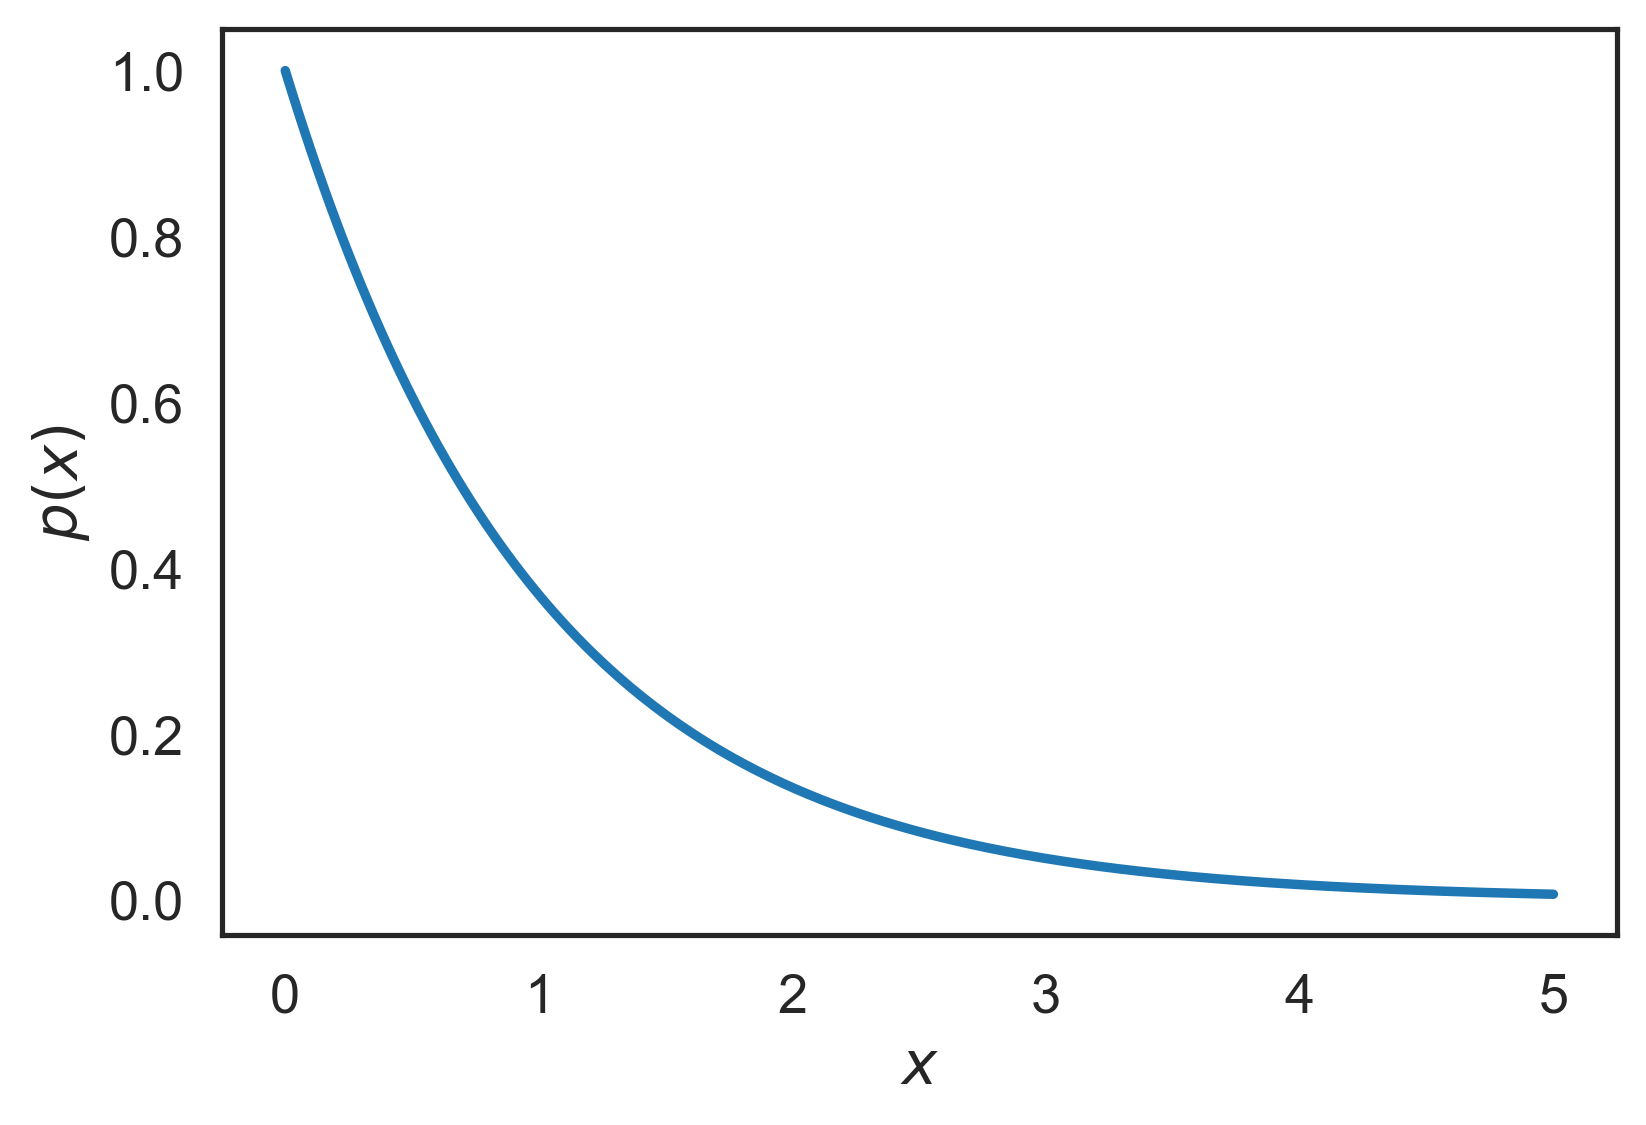

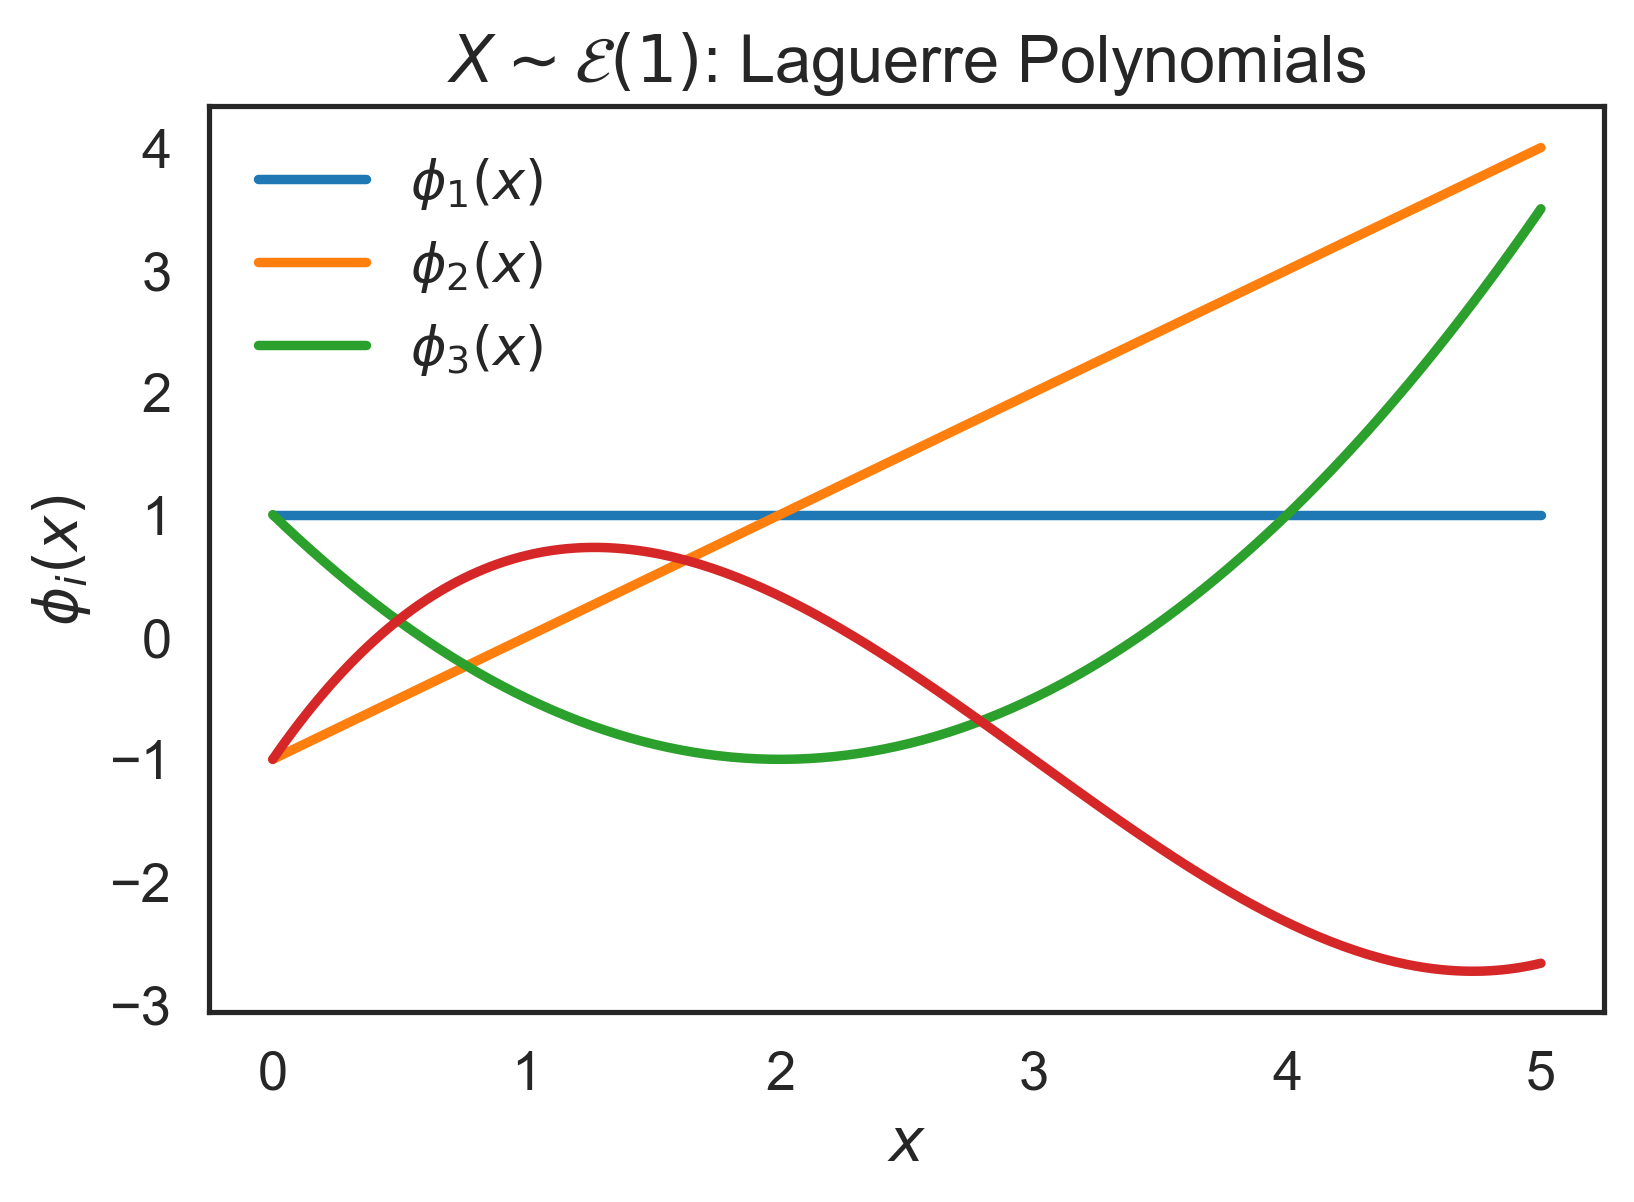

In [8]:
# The random variable you wish to consider
X = st.expon()
# The maximum polynomial degree you want
degree = 3
# Construct the orthogonal polynomials
Phi_set = orthpol.OrthogonalPolynomial(degree, X)

# Plot the probability density
fig, ax = plt.subplots()
x = np.linspace(0, 5, 200)
ax.plot(x, X.pdf(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

# Plot them
fig, ax = plt.subplots()
# Evaluate the orhtogonal polynomials on all these x's
phi_x = Phi_set(x)    # 200 x (degree + 1)
# Plot each one of them
ax.plot(x, phi_x);
ax.set_xlabel('$x$')
ax.set_ylabel('$\phi_i(x)$')
ax.set_title('$X\sim\mathcal{E}(1)$: Laguerre Polynomials')
plt.legend(['$\phi_{%d}(x)$' % i for i in range(1, degree + 1)], loc='best');

### Example 3: The Uniform and the Legendre Polynomials

Let $X\sim\mathcal{U}(-1, 1)$. The orthogonal polynomials in this case are known as the [Laguerre polynomials](https://en.wikipedia.org/wiki/Laguerre_polynomials).
They are known analytically.
The first few are:
$$
\begin{array}{ccc}
\phi_1(x) &=& 1,\\
\phi_2(x) &=& x,\\
\phi_3(x) &=& \frac{1}{2}\left(3x^2 -1\right).
\end{array}
$$

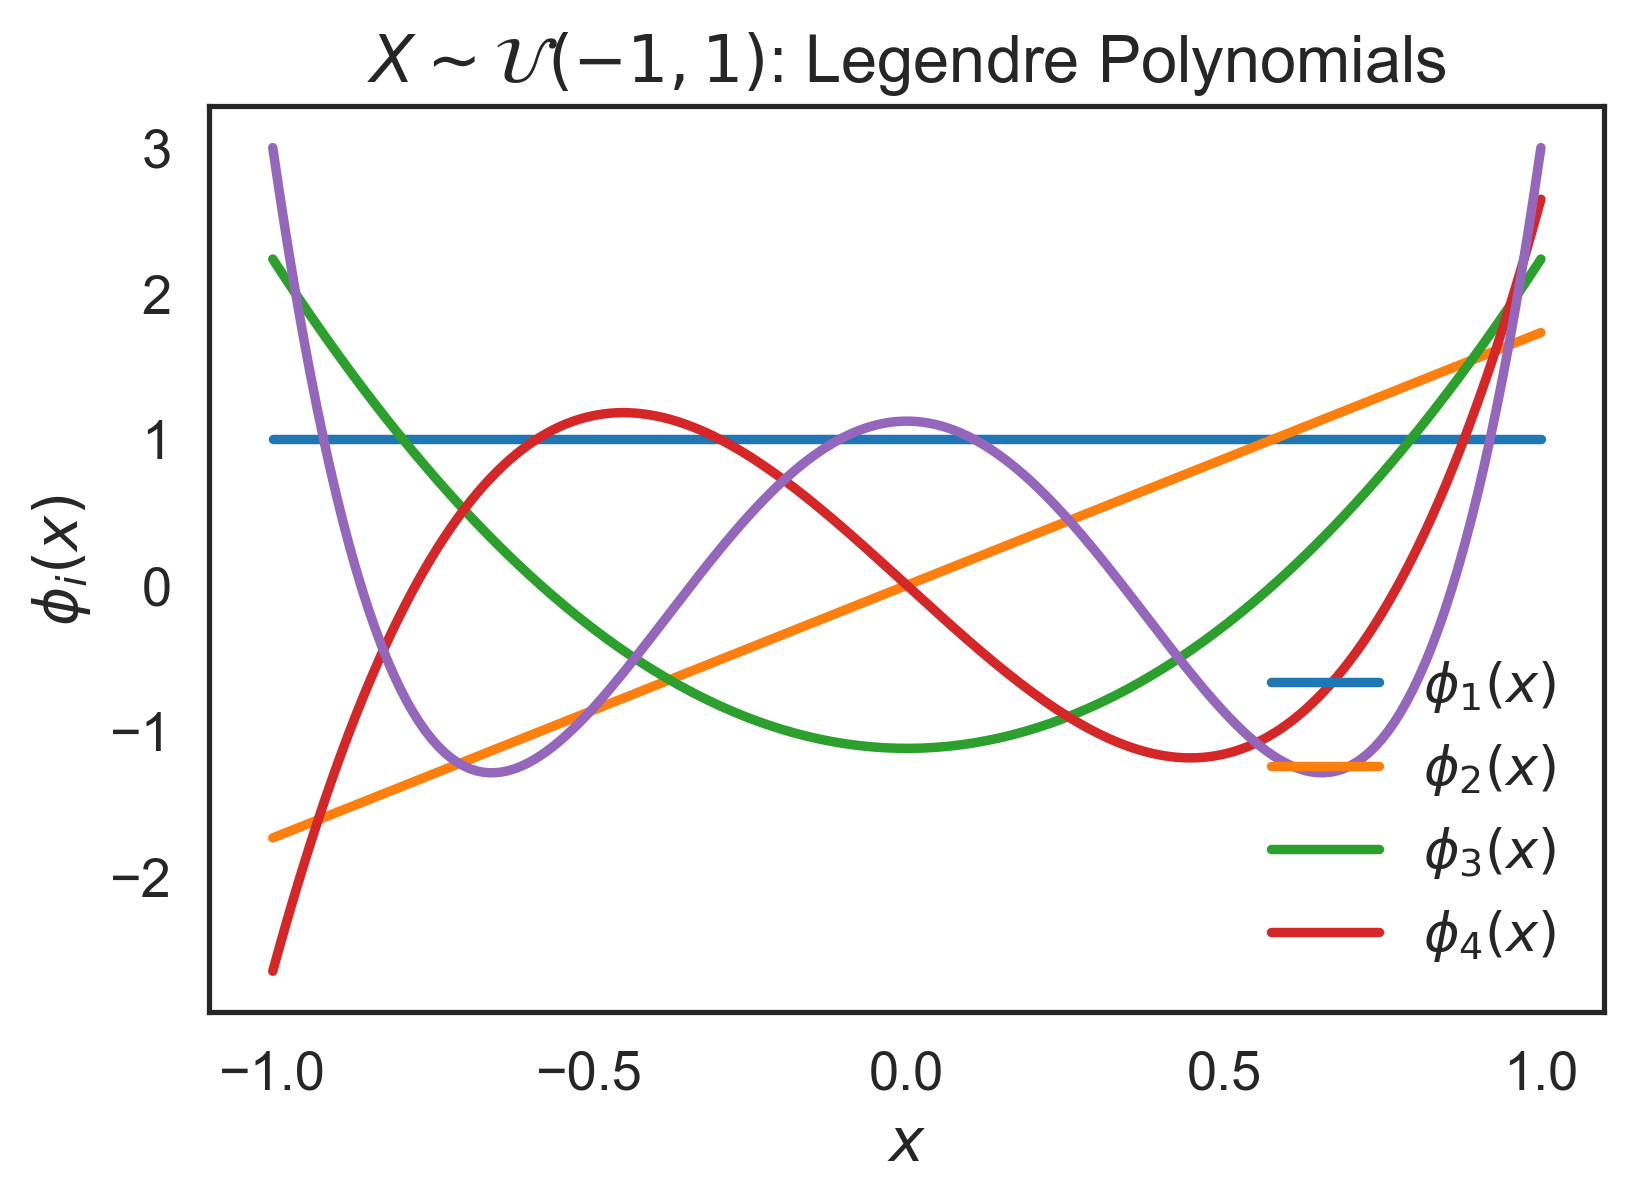

In [6]:
# Now, instead of the random variable let's use the the p(x) derectly
p = lambda x: 0.5
# The maximum polynomial degree you want
degree = 4
# Construct the orthogonal polynomials
Phi_set = orthpol.OrthogonalPolynomial(degree,
                                       wf=p,    # The weight function (or pdf)
                                       left=-1, # The left bound
                                       right=1  # The right bound
                                       )

# Plot them
fig, ax = plt.subplots()
# Evaluate the orhtogonal polynomials on all these x's
x = np.linspace(-1, 1, 200)
phi_x = Phi_set(x)    # 200 x (degree + 1)
# Plot each one of them
ax.plot(x, phi_x);
ax.set_xlabel('$x$')
ax.set_ylabel('$\phi_i(x)$')
ax.set_title('$X\sim\mathcal{U}(-1, 1)$: Legendre Polynomials')
plt.legend(['$\phi_{%d}(x)$' % i for i in range(1, degree + 1)], loc='best');

## Example 4: We can do it for any probability density

We can construct orthonormal for any random variable $X$.
Let's do it for a mixture of Gaussians:
$$
p(x) = \pi_1 \mathcal{N}(x|\mu_1,\sigma_1^2) + \pi_2\mathcal{N}(x|\mu_2,\sigma_2),
$$
for $\pi_1 + \pi_2 = 1$.

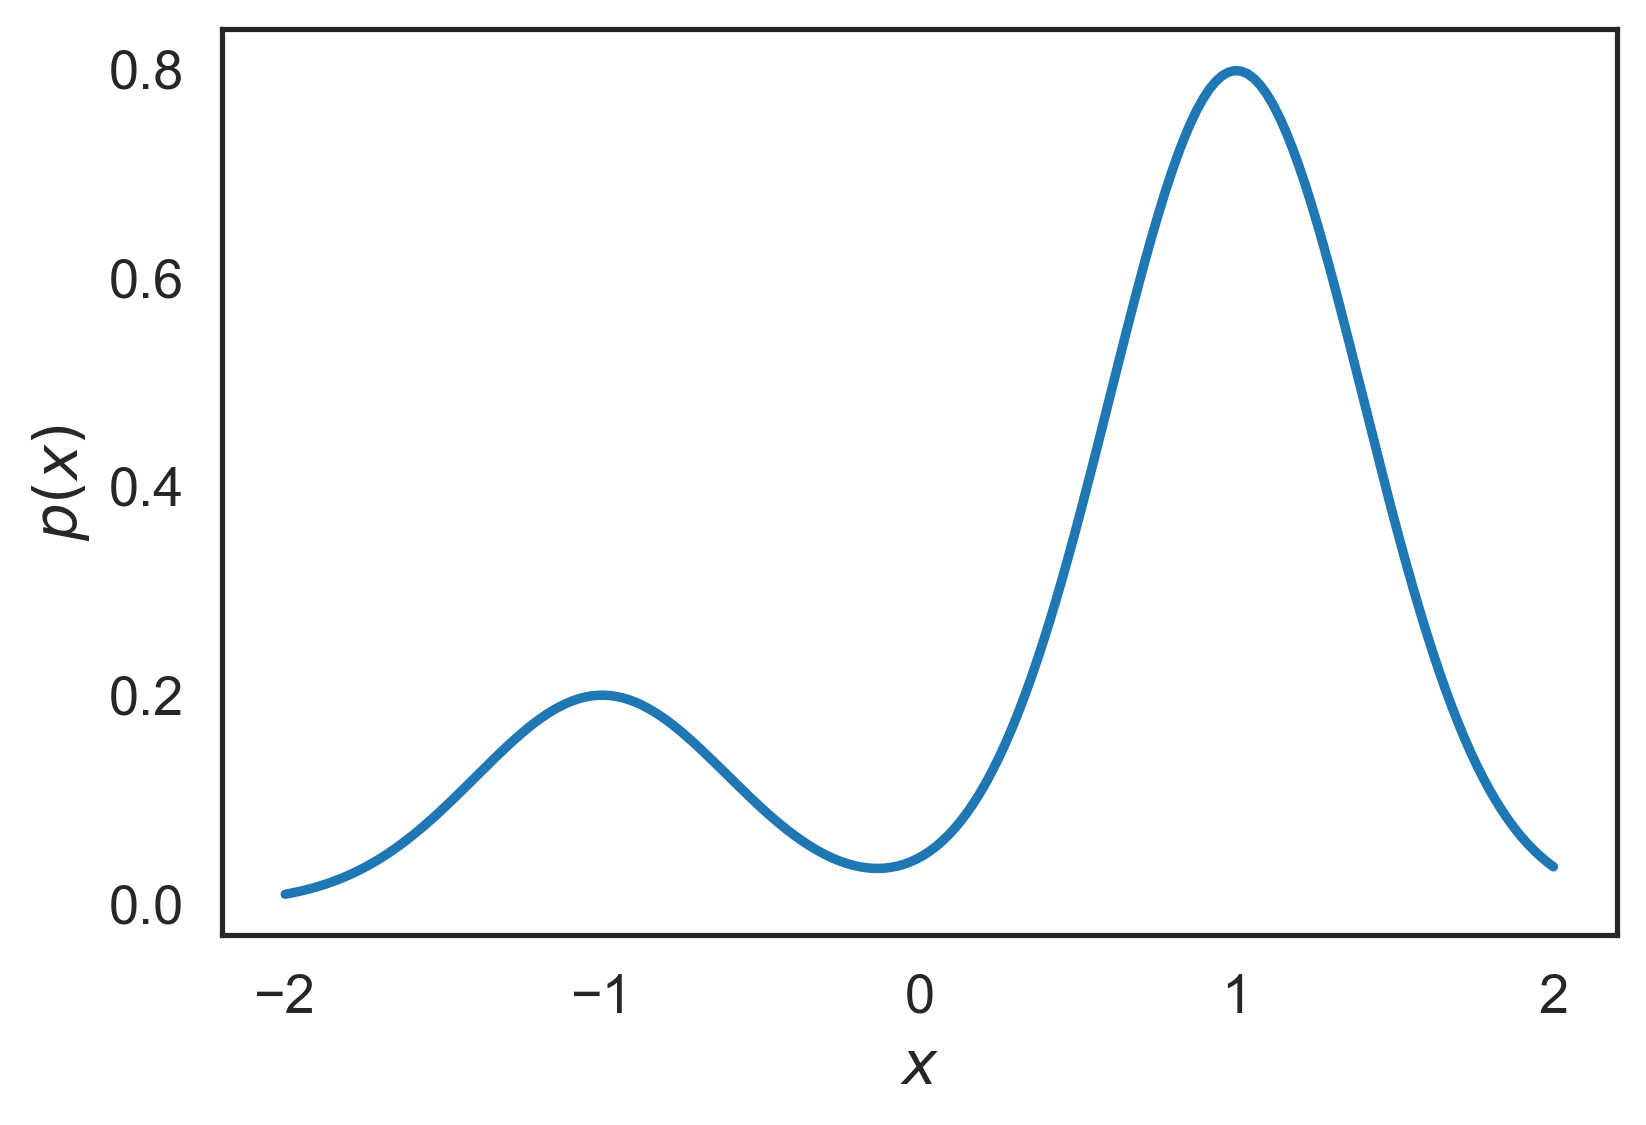

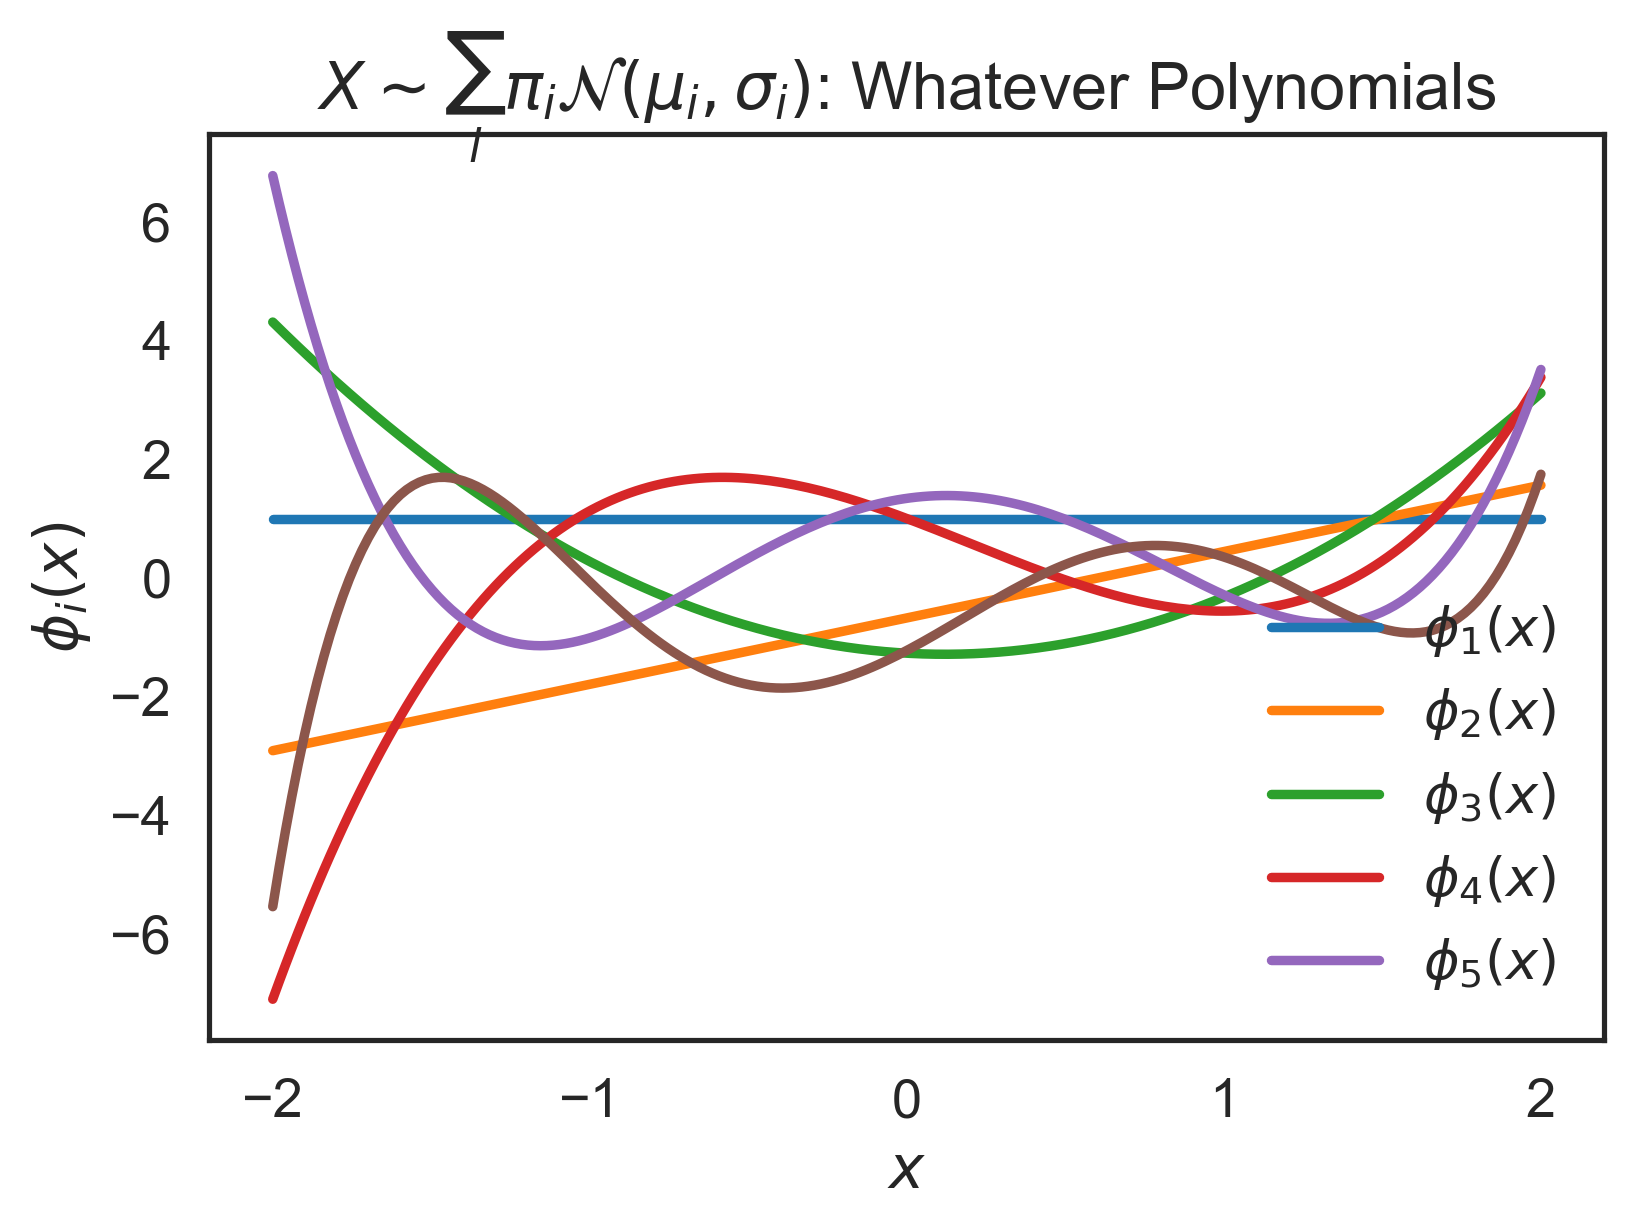

In [9]:
# The random variable you wish to consider
X1 = st.norm(loc=-1, scale=0.4)
pi_1 = 0.2
X2 = st.norm(loc=+1, scale=0.4)
pi_2 = 0.8

p = lambda x: pi_1 * X1.pdf(x) + pi_2 * X2.pdf(x)

# The maximum polynomial degree you want
degree = 5
# Construct the orthogonal polynomials
Phi_set = orthpol.OrthogonalPolynomial(degree, wf=p, left=-np.inf, right=np.inf)

# Plot the probability density
fig, ax = plt.subplots()
x = np.linspace(-2, 2, 200)
ax.plot(x, p(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

# Plot them
fig, ax = plt.subplots()
# Evaluate the orhtogonal polynomials on all these x's
phi_x = Phi_set(x)    # 200 x (degree + 1)
# Plot each one of them
ax.plot(x, phi_x);
ax.set_xlabel('$x$')
ax.set_ylabel('$\phi_i(x)$')
ax.set_title('$X\sim\sum_i\pi_i\mathcal{N}(\mu_i,\sigma_i)$: Whatever Polynomials')
plt.legend(['$\phi_{%d}(x)$' % i for i in range(1, degree + 1)], loc='best');

#### Questions

+ Generate the first few orthogonal polynomials for a Beta distribution.

+ Generate the first few orthogonal polyonomials for a Log-normal distribution.

## The Space of Square Integrable Functions and Higher-Dimensional Orthogonal Polynomials

Let $X$ be a random vector with probability density $p(x)$.
In this section, we will construct a polynomial orthonormal basis for the space of square integrable functions $f:\mathbb{R}^d\rightarrow \mathbb{R}$.
Let the underlying vector space be $\mathcal{F}_d$ with the previously defined inner product.

### Definition of Polynomials
A *polynomial* of degree $\rho$ is a scalar function of the vector variable:
$$
g(x;a) = \sum_{|i_1+\dots +i_d|\le \rho} a_{i_1\dots i_d}x_1^{i_1}\dots x_d^{i_d},
$$
where $a = (a_{0\dots 0},\dots,)$ are the coefficients of the polynomial.


### Orthonormal Polynomials
A set $\phi_1,\phi_2,\dots$ of polynomials are *orthonormal polynomials* with respect to $p(x)$ if they form an orthonormal basis of the underlying Hilbert space.
In other words:

1. Each $\phi_i$ must be a polynomial:
$$
\phi_i(x) = \sum_{|i_1+\dots +i_d|\le \rho} a_{i_1\dots i_d}x_1^{i_1}\dots x_d^{i_d}.
$$

2. For any $i\not=j$ we have:
$$
\langle\phi_i, \phi_j\rangle = \mathbb{E}_p[\phi_i(X)\phi_j(X)] = \int_{-\infty}^\infty\dots\int_{-\infty}^\infty
\phi_i(x)\phi_j(x)p(x)dx_1\dots dx_d = 0.
$$

3. They are normalized:
$$
\parallel \phi_i\parallel^2 = \langle \phi_i,\phi_i\rangle = \int_{-\infty}^\infty\dots\int_{-\infty}^\infty \phi_i^2(x)p(x)dx_1\dots dx_d = 1.
$$

For some weird reason the set of such polynomials are called "polynomial chaos."
You can call them orthonormal polynomials with respect to $p(x)$...

### Constructing Orthogonal Polynomials in Higher-Dimensions

The [Gram-Schmidt process](https://en.wikipedia.org/wiki/Gram–Schmidt_process) would work here as well (you can start from all monomials).
However, it is not very convenient.

Let's take the special case of a random vector $X=(X_1,\dots,X_d)$ that consists of independent random variables.
This may look like a very special case, but (at least in principle) it is always possible to transofrm the original random vector so that this assumption is satisfied, see the [Rosenblatt Transformation](http://doc.openturns.org/openturns-0.13.2/doc/html/ReferenceGuide/output/OpenTURNS_ReferenceGuidesu51.html).
Under the independence assumption the probability density of $X$ factorizes:
$$
p(x) = p(x_1,\dots,x_d) = \prod_{i=1}^d p_i(x_i),
$$
where $p_i(x_i)$ is the PDF of the $i$-th component $X_i$.

We can use the ORTHPOL package to construct an orthonormal polynomial basis for each of the $p_i$'s.
Say, for $p_i$ we construct $\phi_{i1},\phi_{i2},\dots$.
To build an orthonormal basis in $\mathcal{F}_d$ we take the *tensor product* of all these 1D polynomials.
This procedure is quite cumbersome to describe in its full complexity, but the first few higher-dimensional polynomials that we construct are:
$$
\begin{array}{ccc}
\phi_1(x) &=& \phi_{11}(x_1)\cdot\dots\cdot\phi_{d1}(x_d) = 1,\\
\phi_2(x) &=& \phi_{11}(x_1)\cdot\dots\cdot\phi_{d2}(x_d) = \phi_{d2}(x_d),\\
&\dots&\\
\phi_{i_1,\dots,i_d}(x) &=& \phi_{1i_1}(x_1)\cdot\dots\cdot\phi_{di_d}(x_d).
\end{array}
$$
With this procedure, if you have $m$ polynomials for each dimension, then you will end up with $m^d$ high-dimensional polynomials.

There is a lot of literature on what is the optimal way to stop trying to keep the number of polynomials low.
In any case, this is a clear indication that the curse of dimensionality will creep in here as well. And it does creep in.

## Example 5: Multidimensional Orthogonal Polynomials

Let's construct orthogonal polynomials for a random vector:
$$
X = (X_1,X_2),
$$
where
$$
X_1\sim\mathcal{N}(0,1),
$$
and
$$
X_2\sim\mathcal{E}(1).
$$

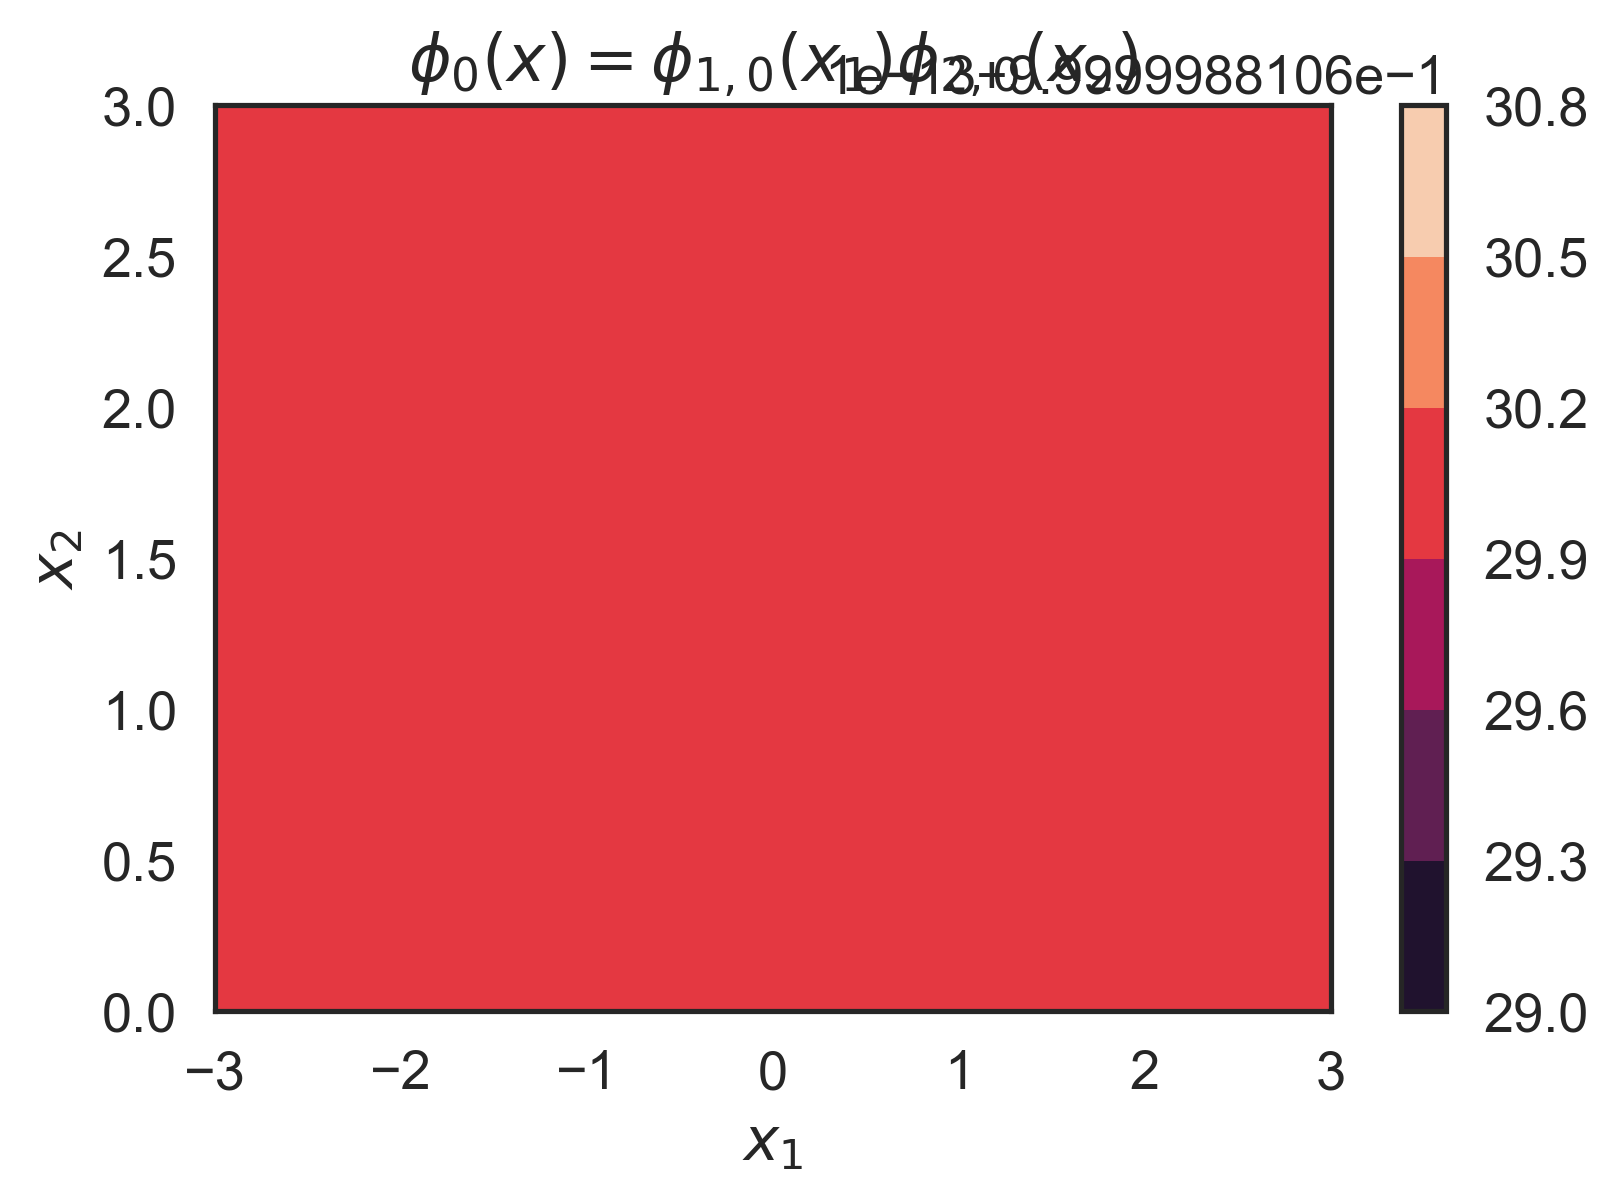

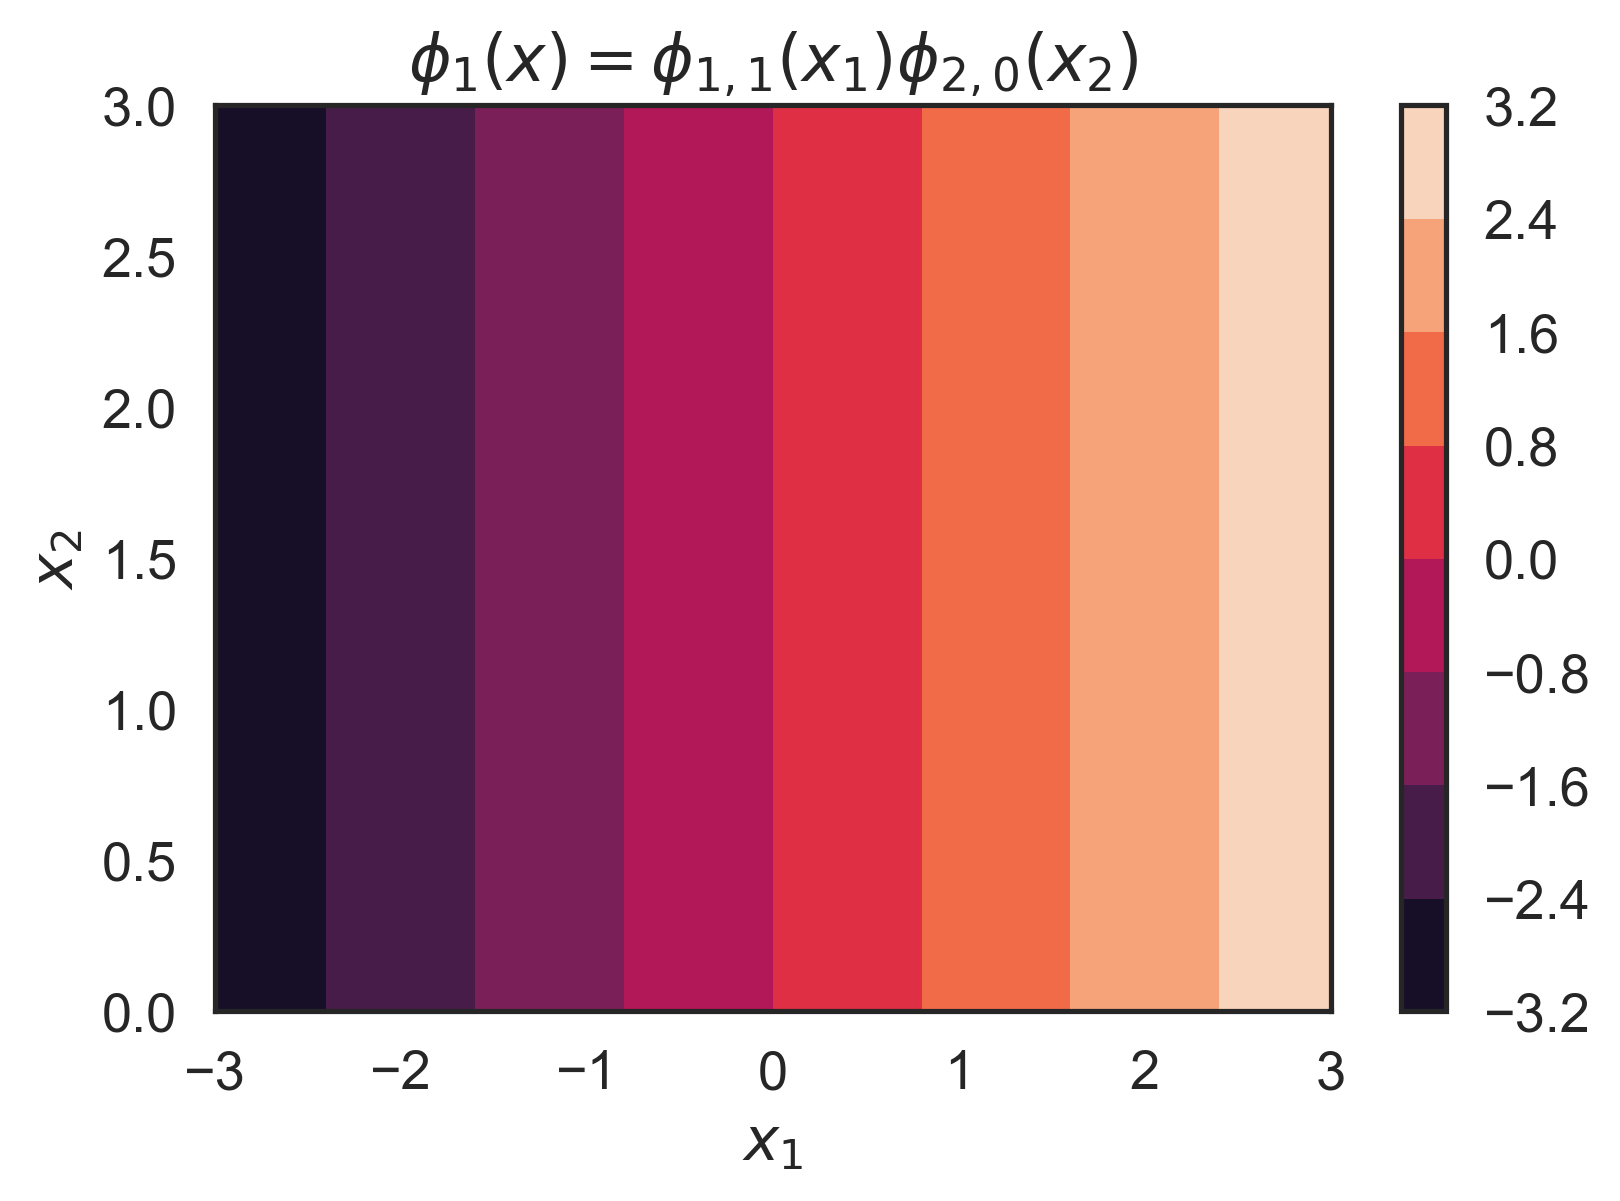

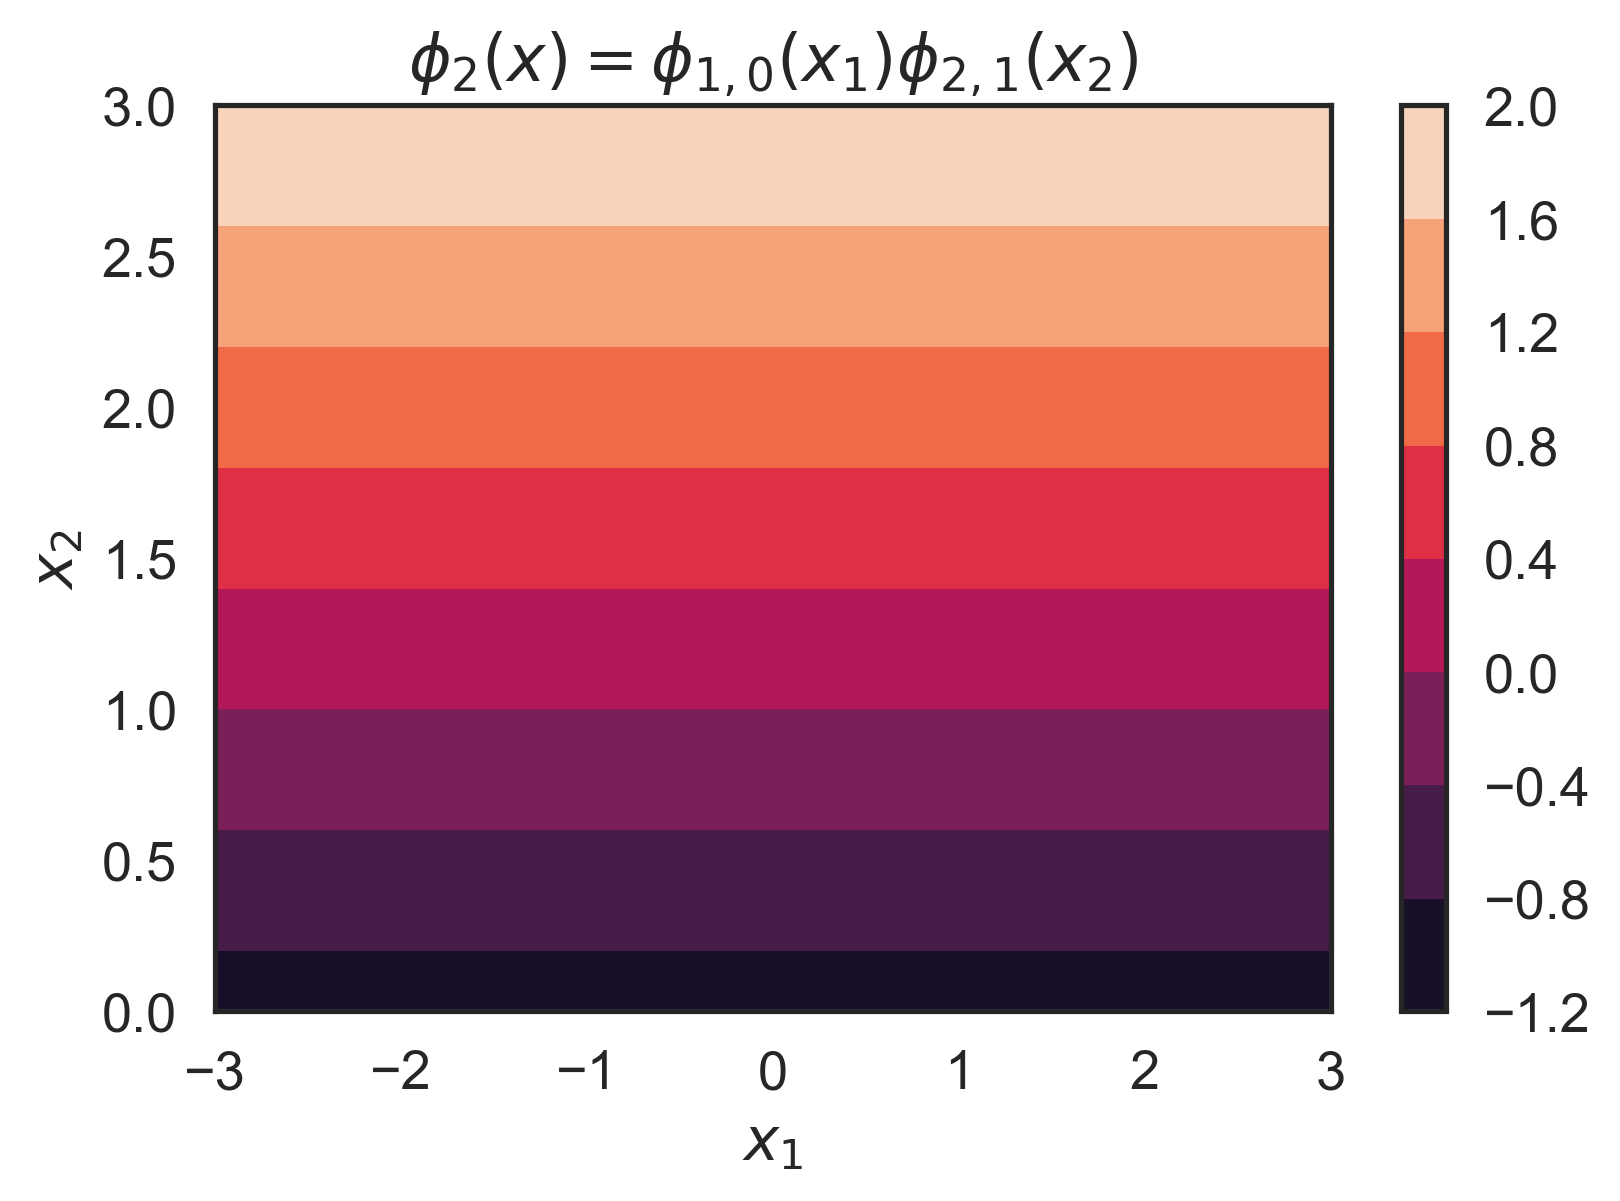

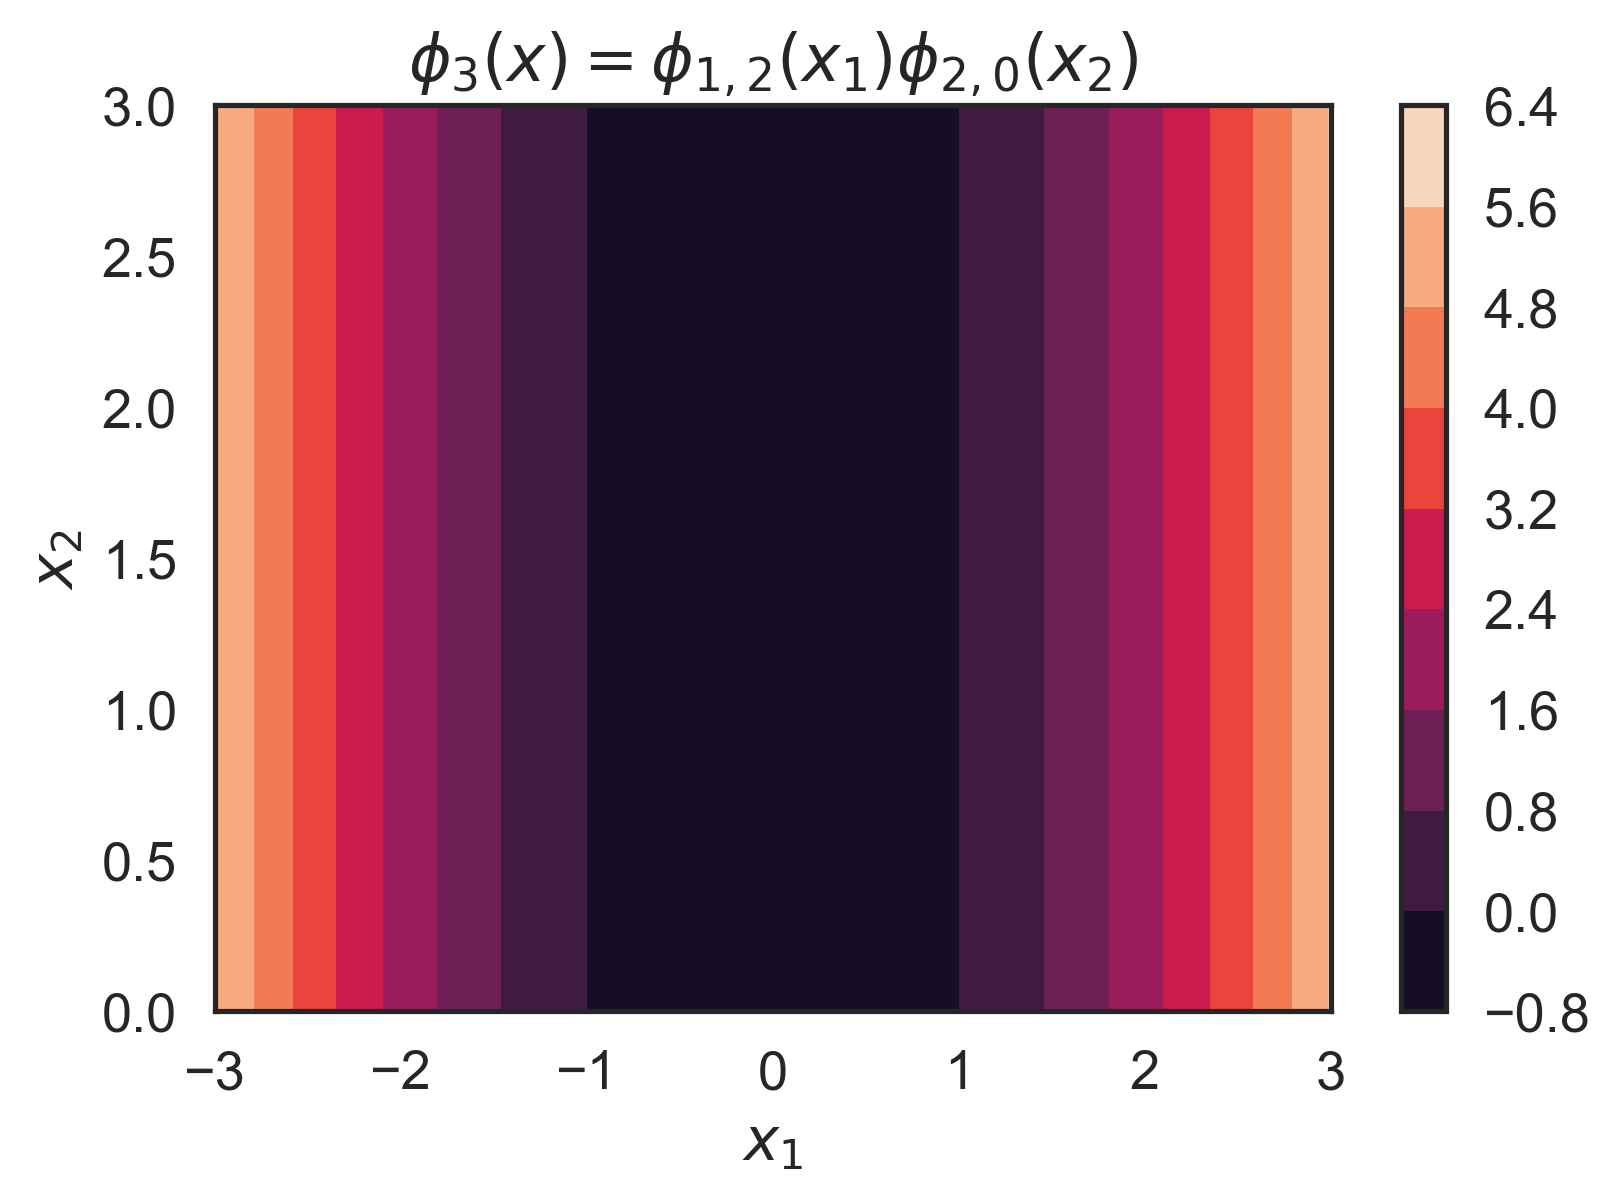

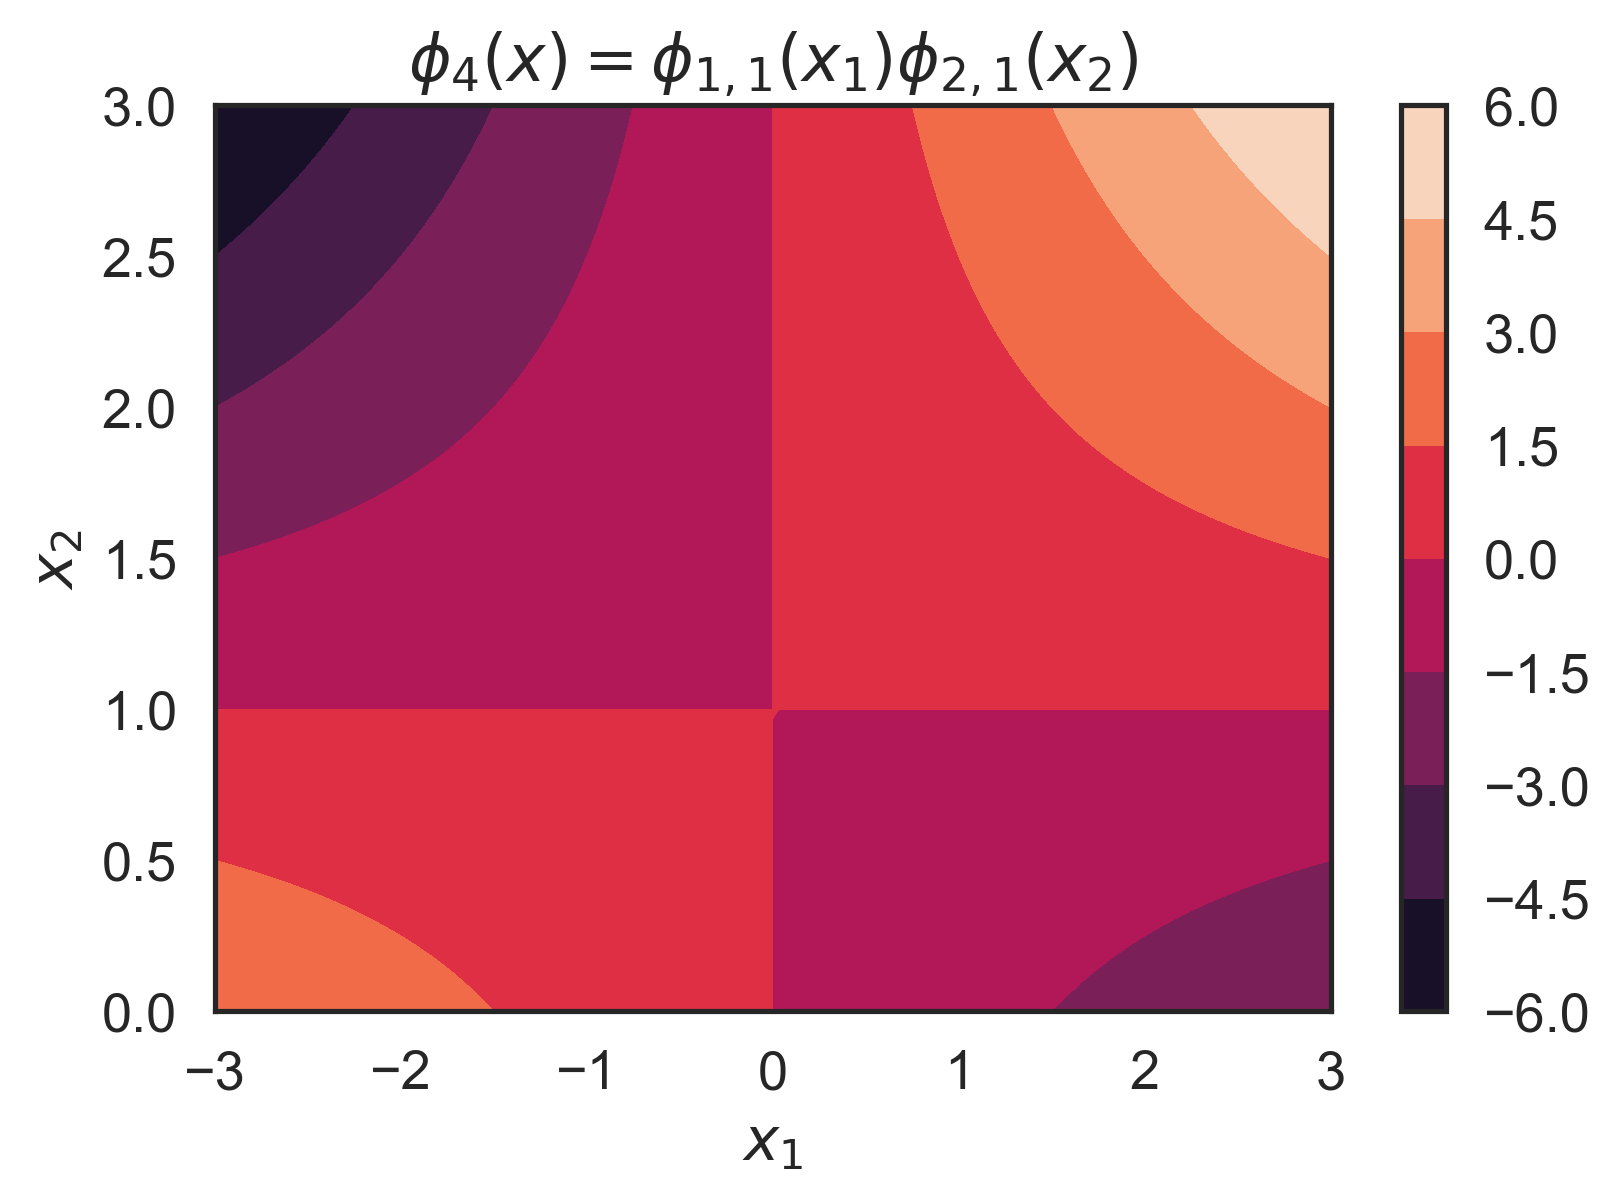

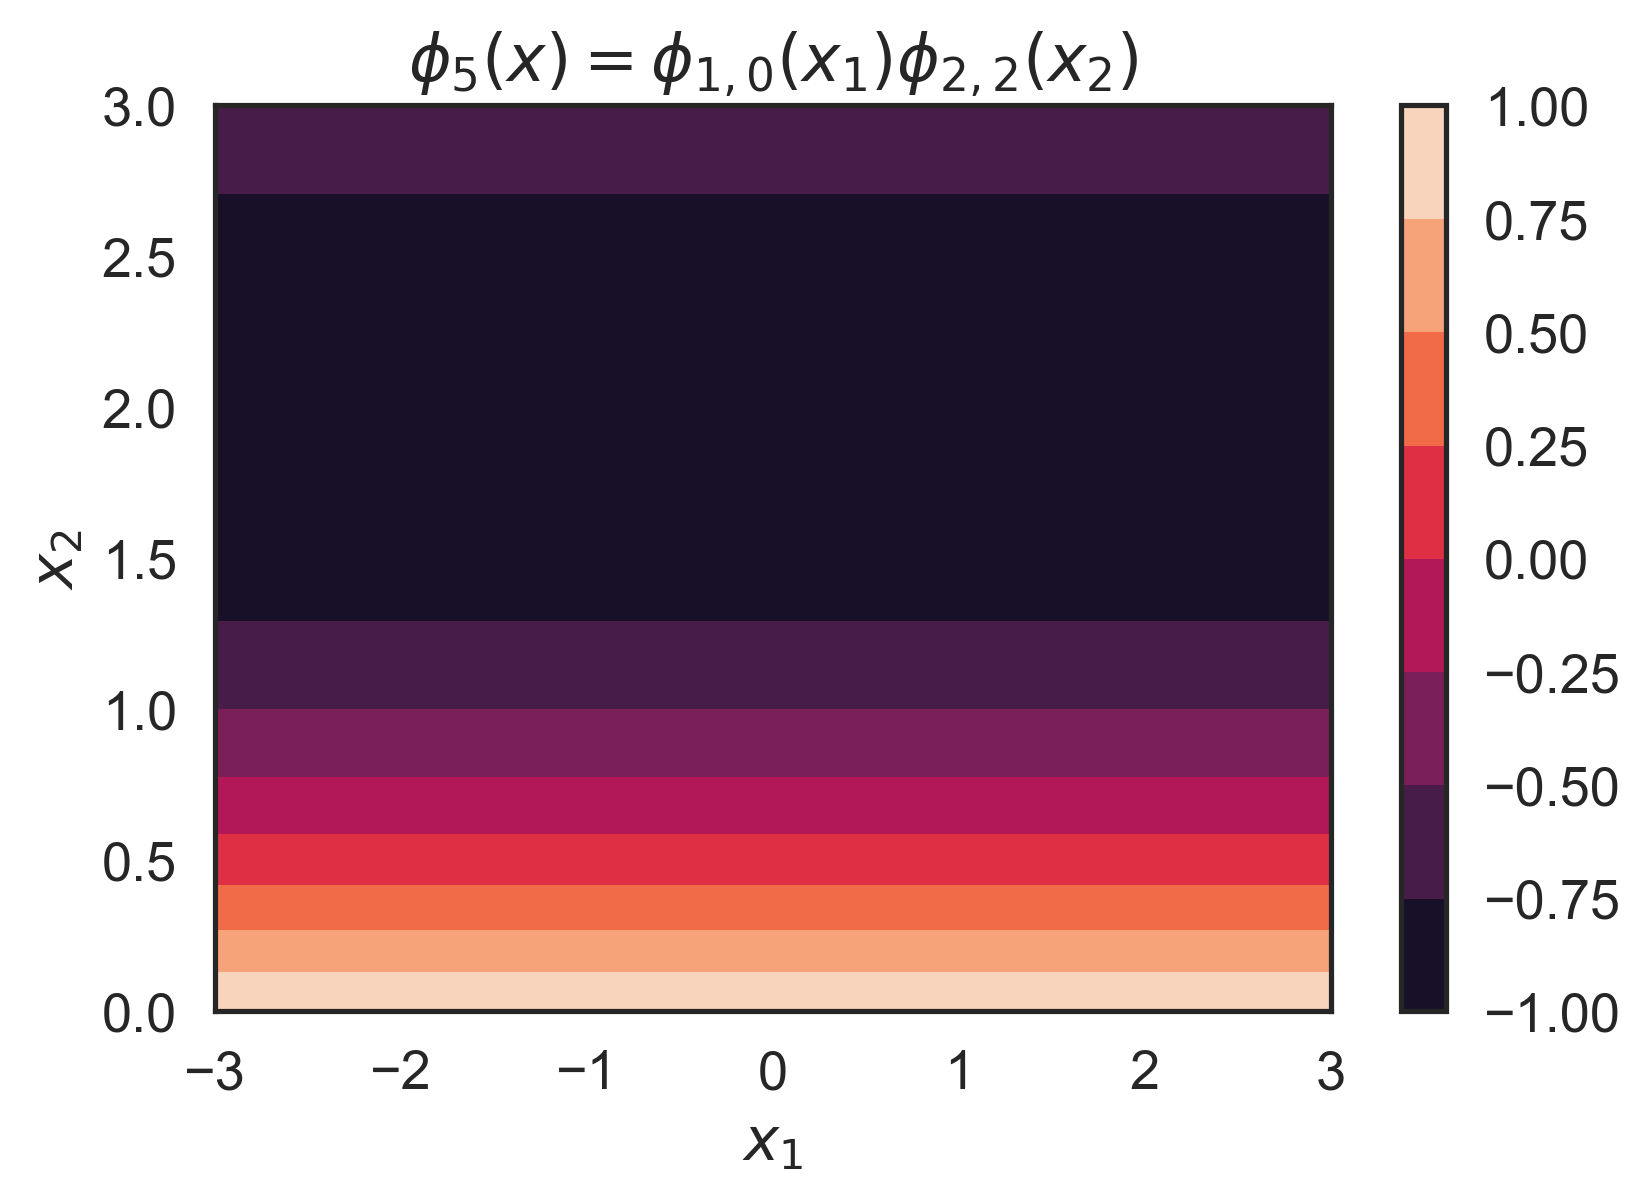

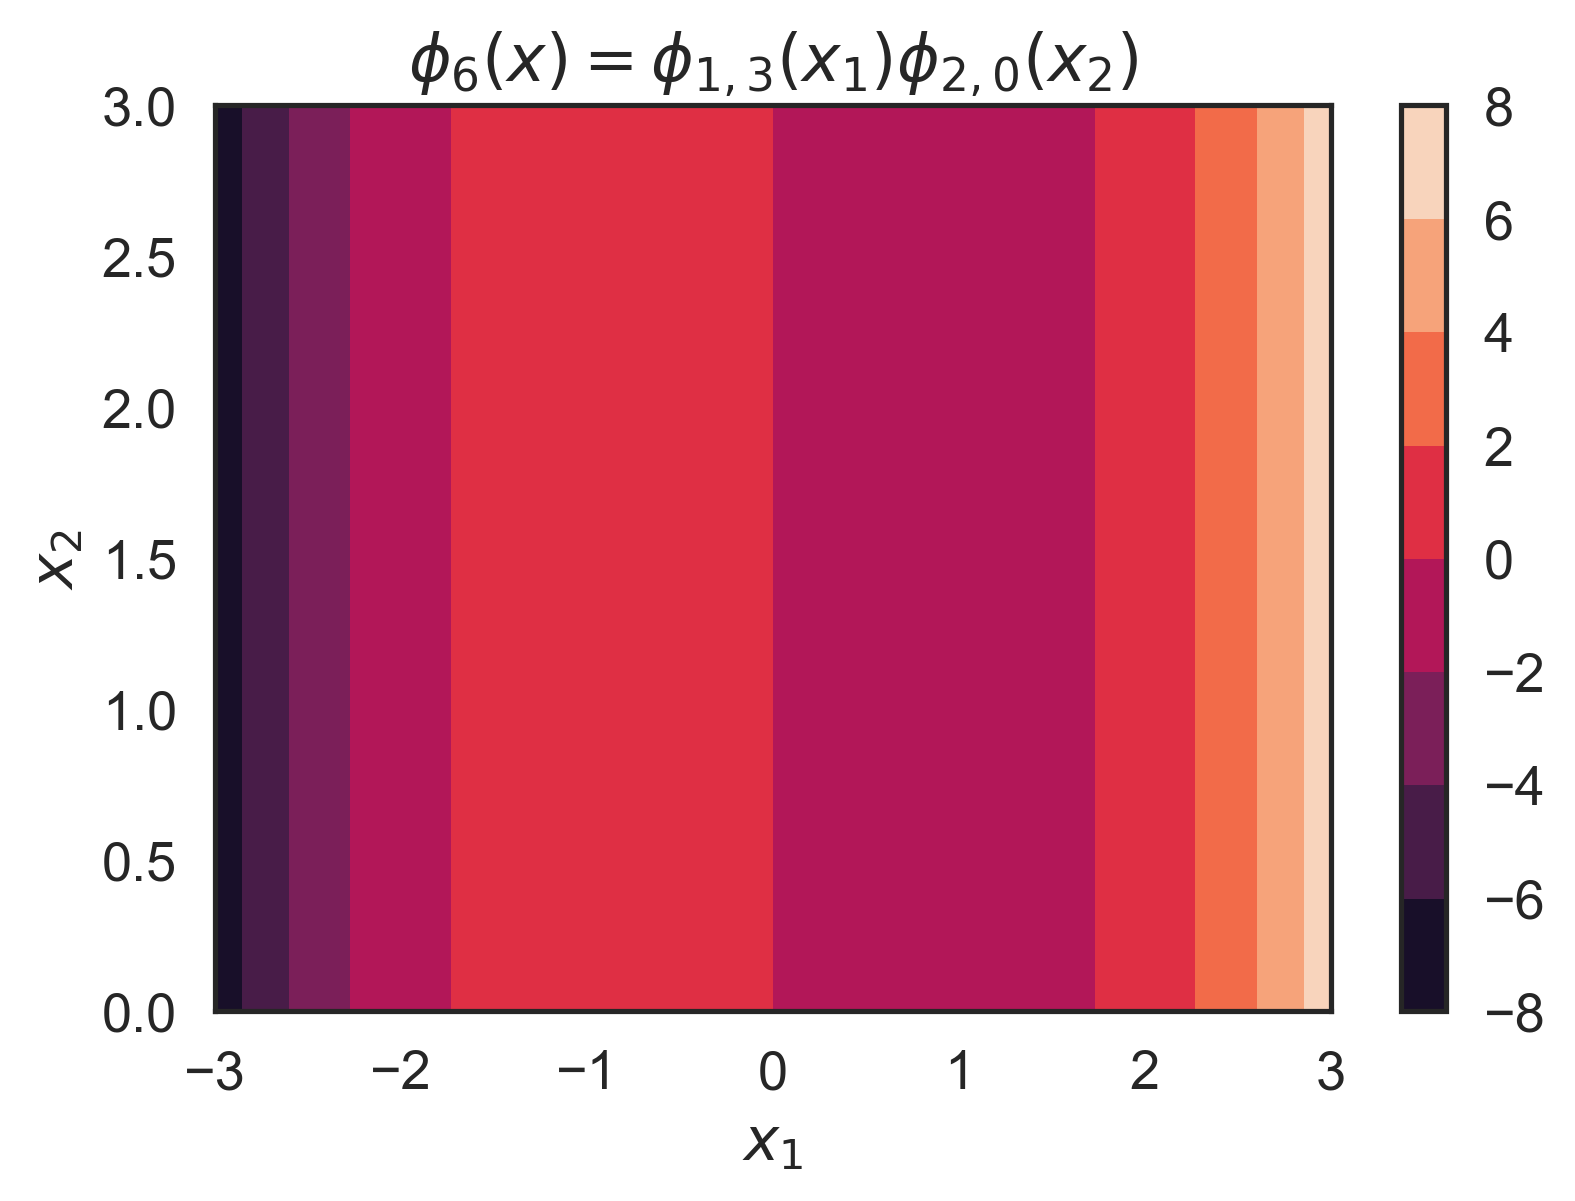

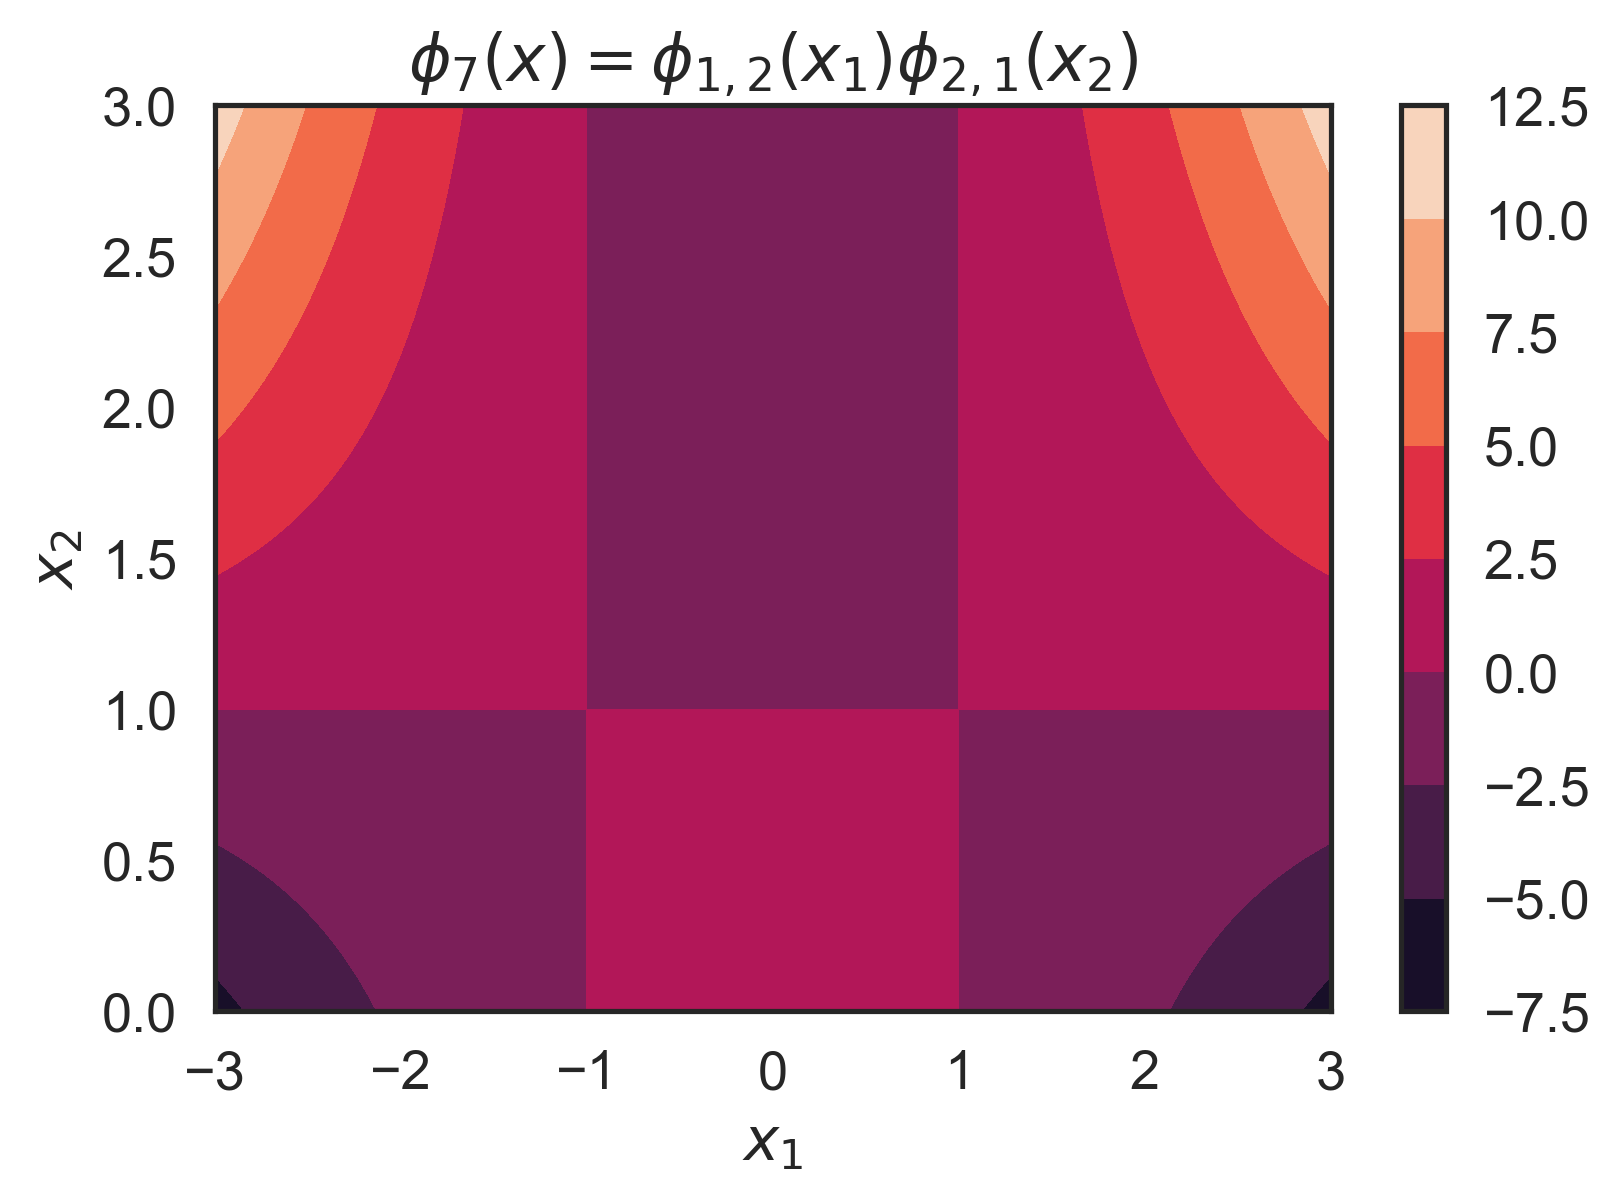

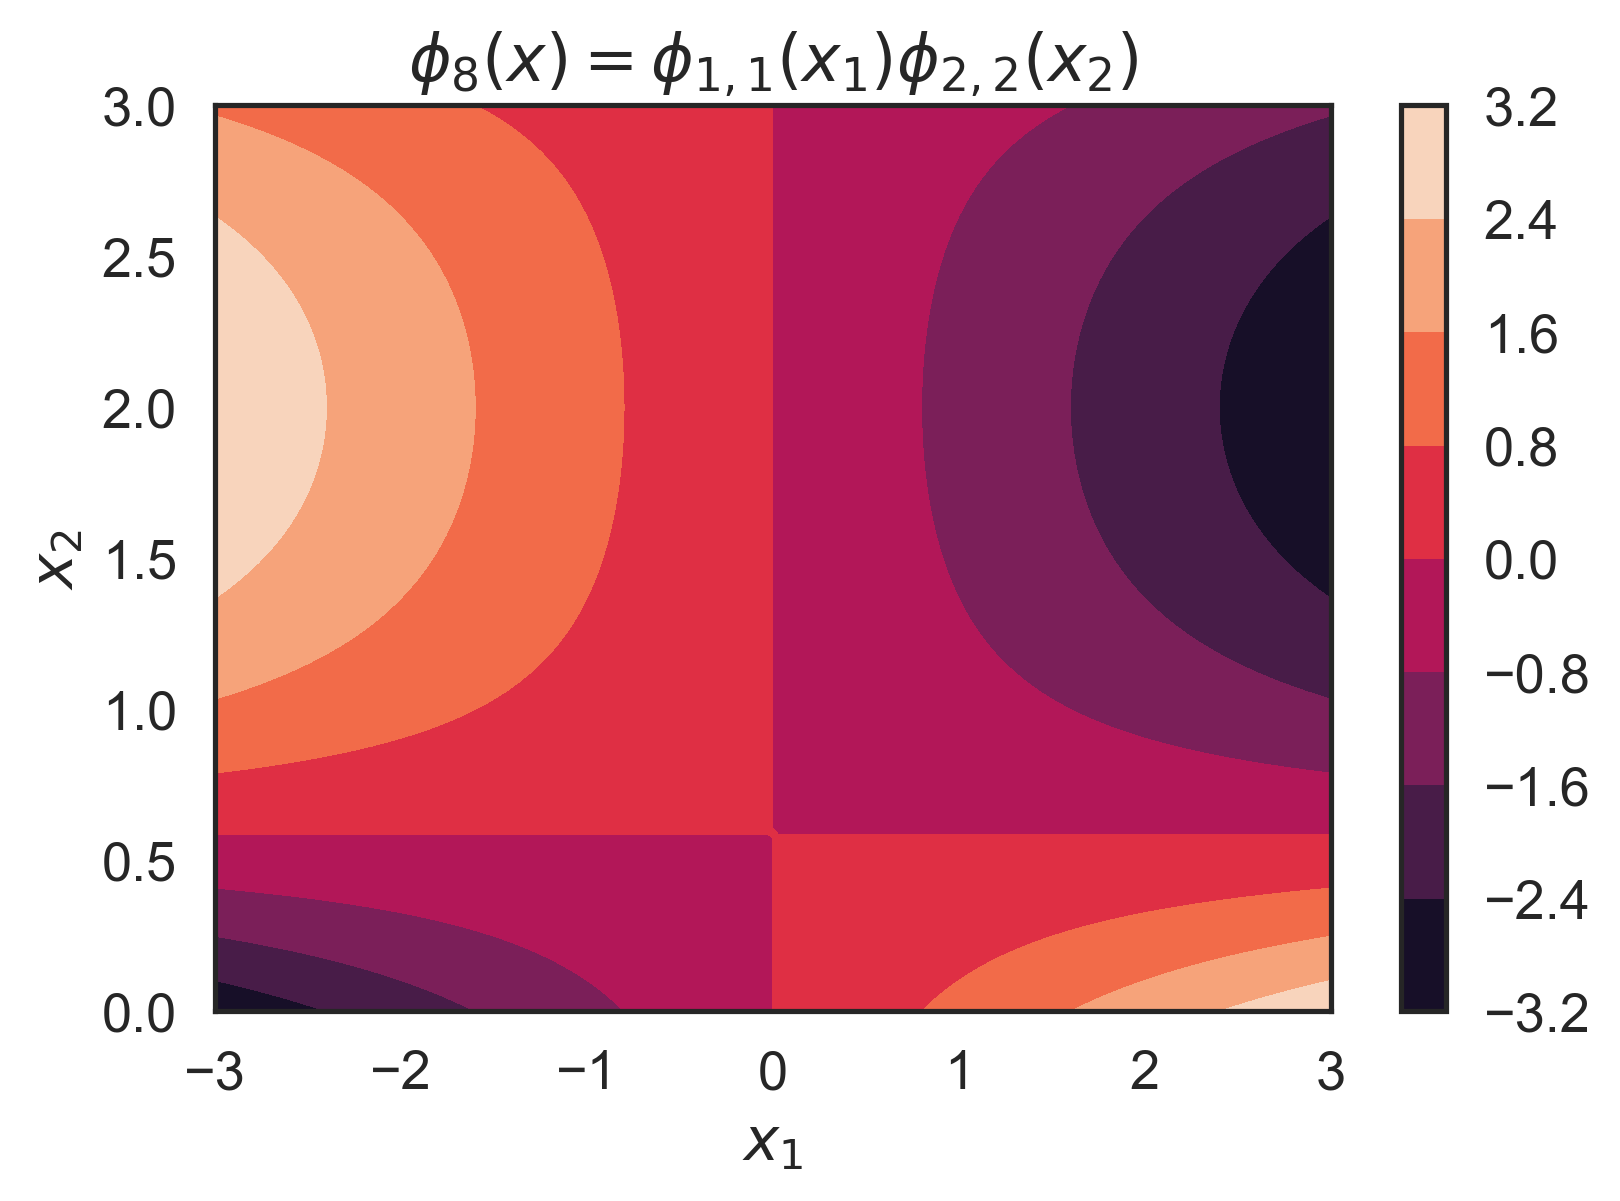

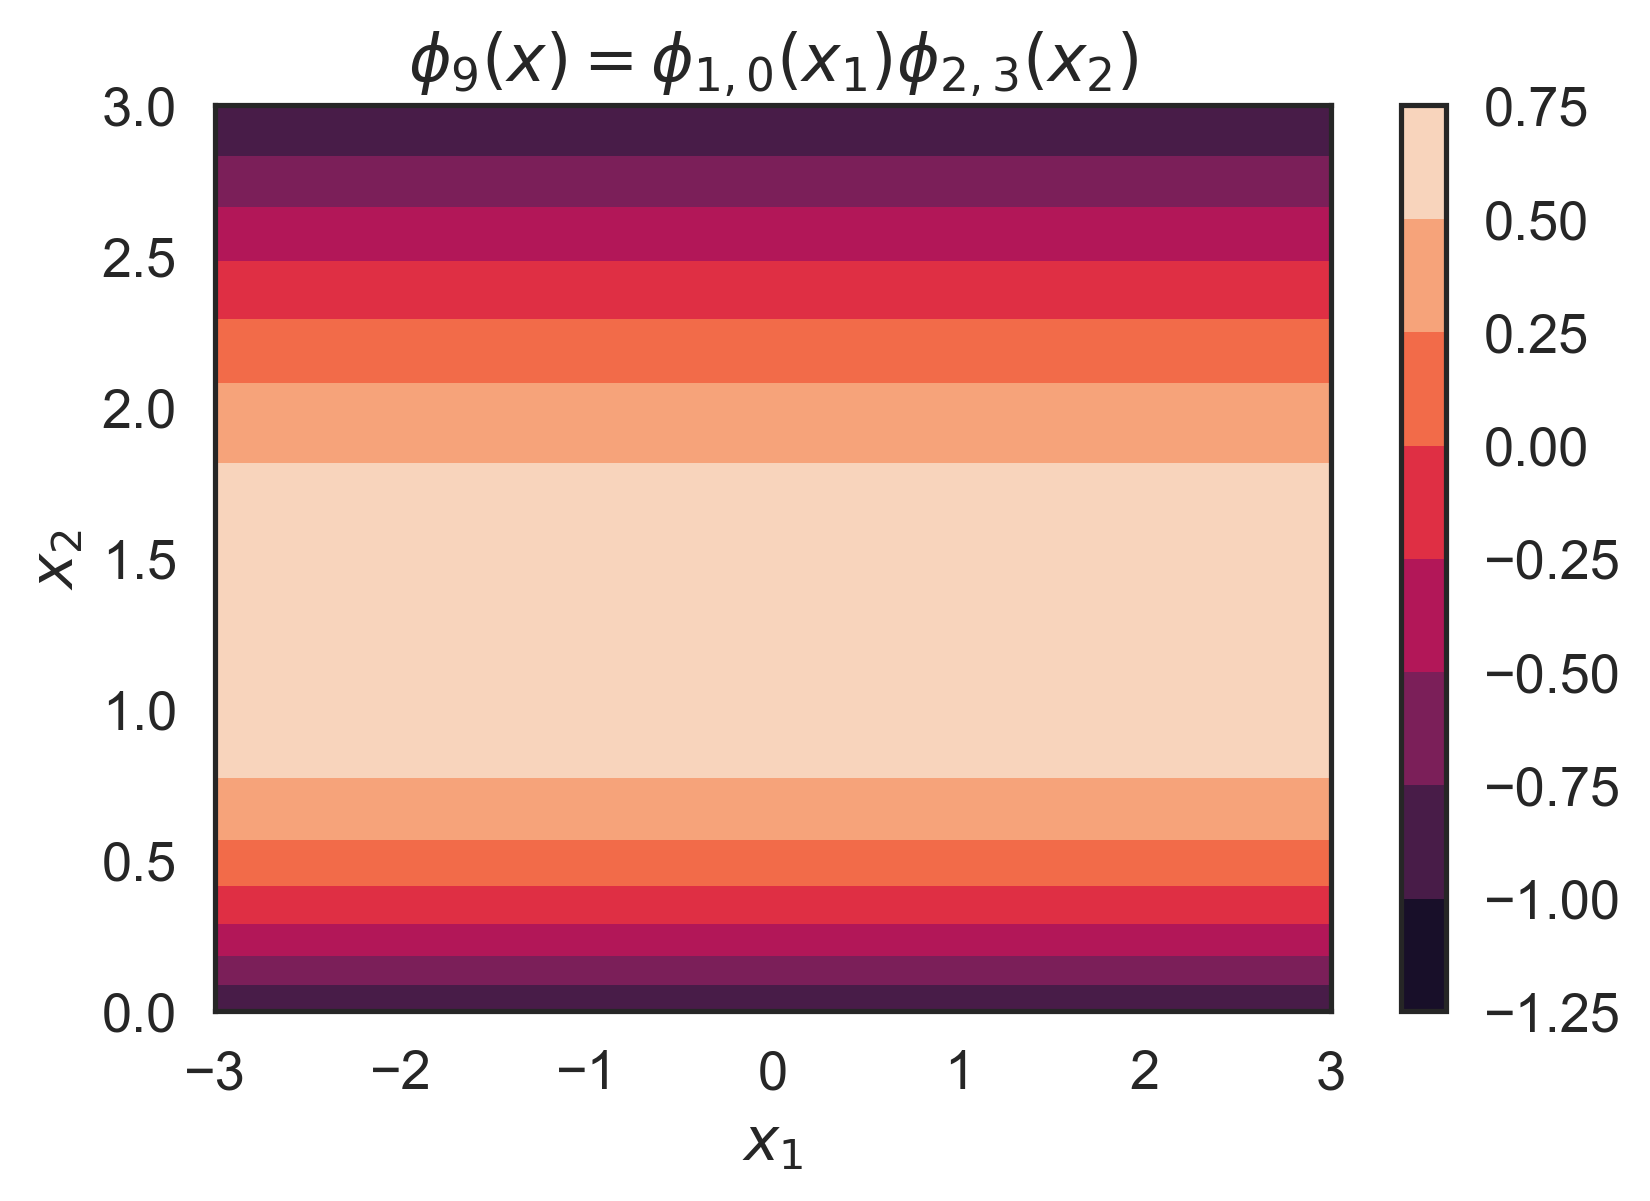

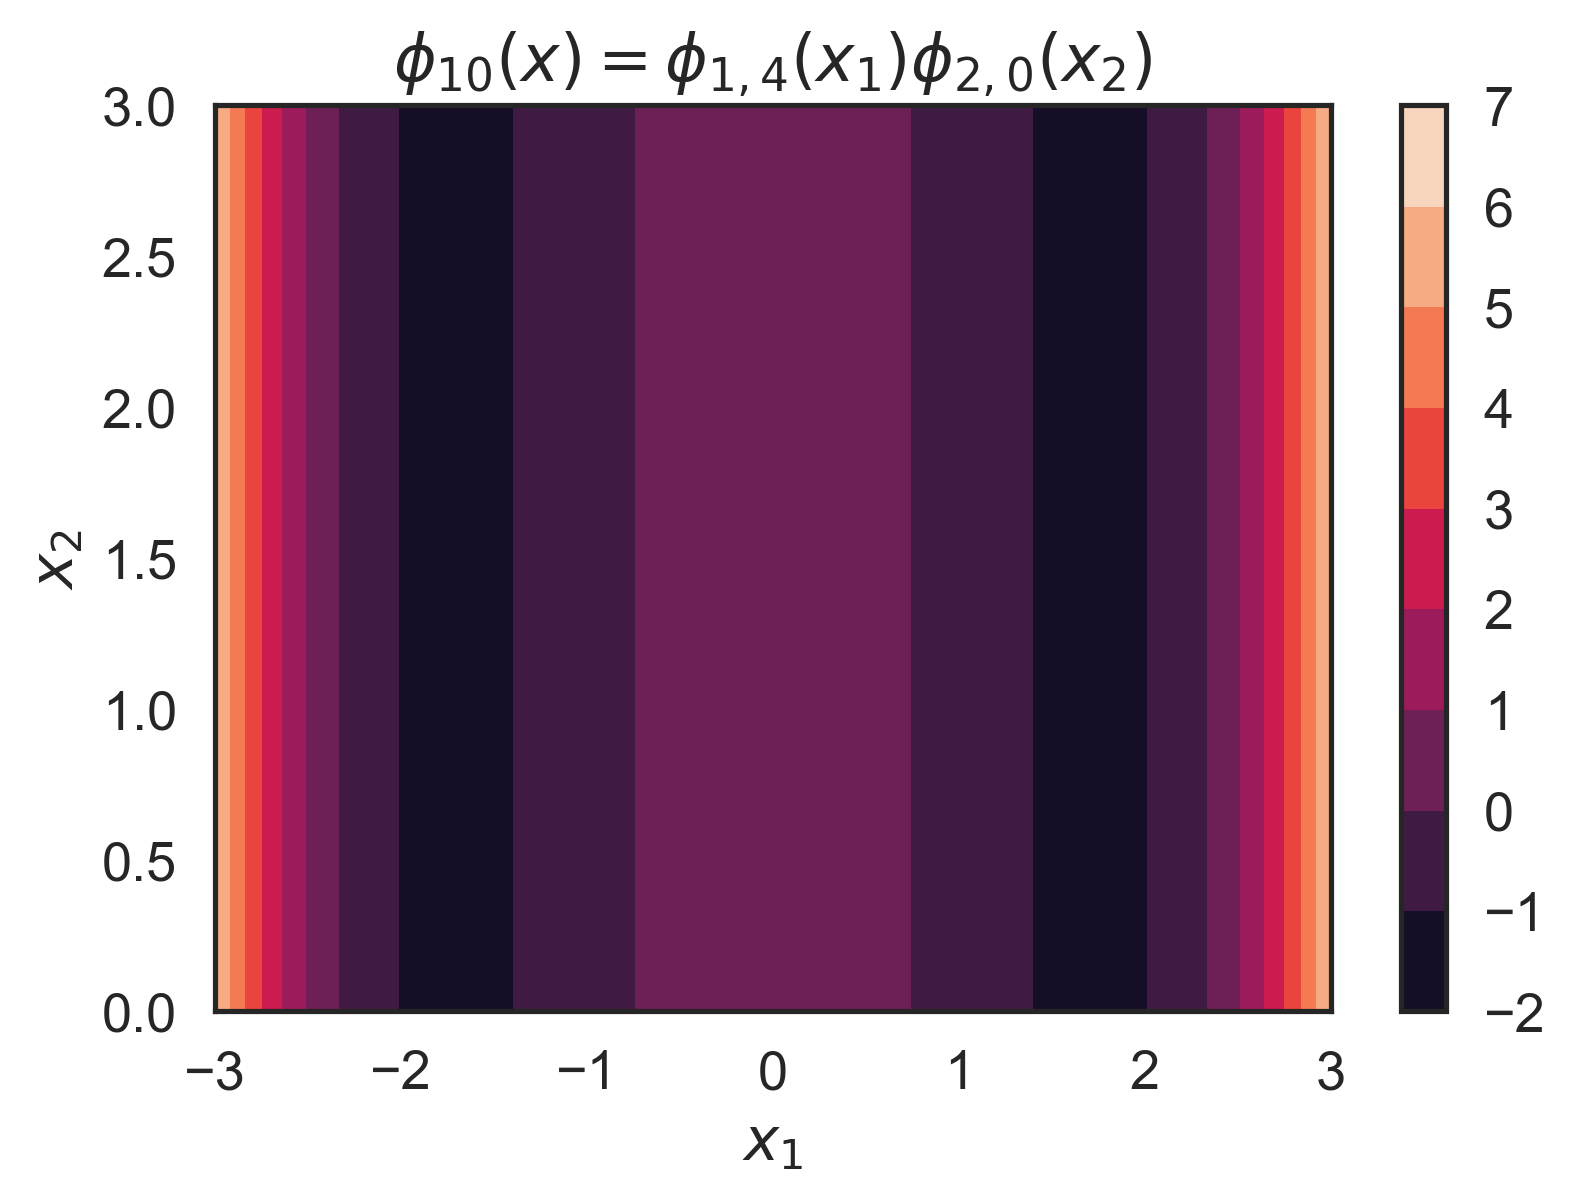

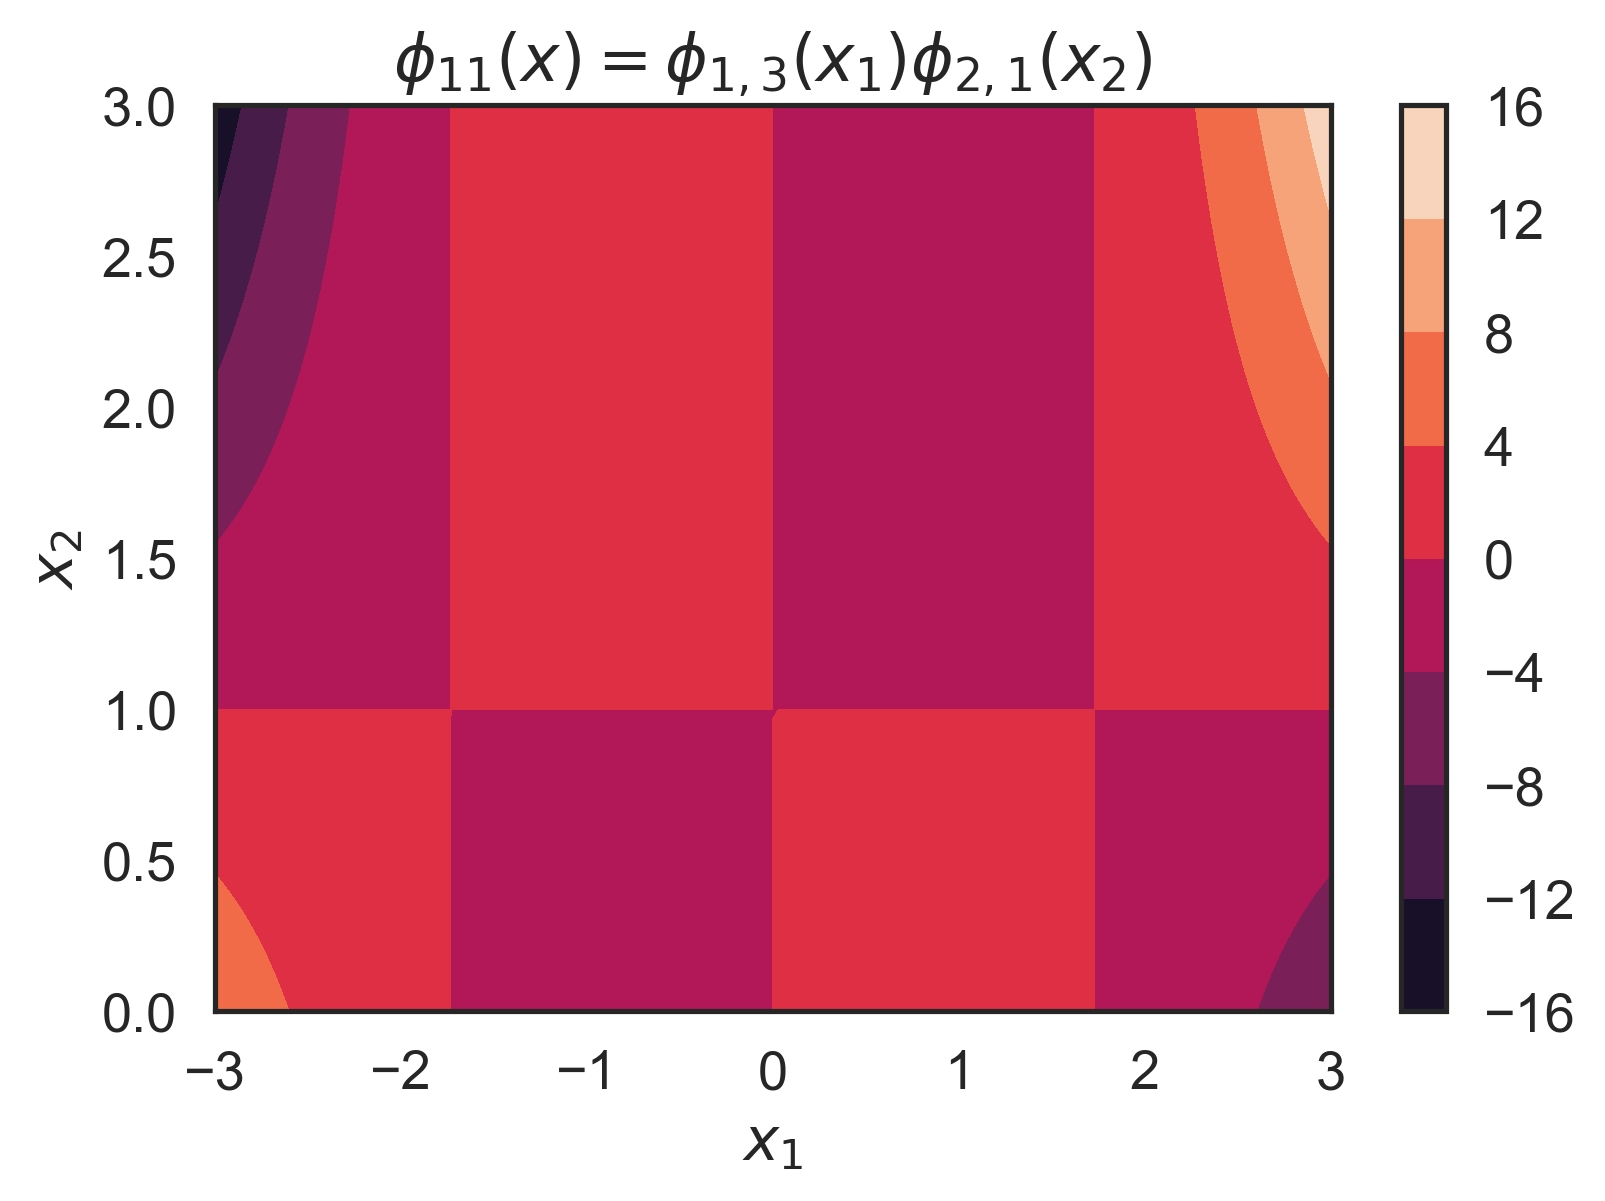

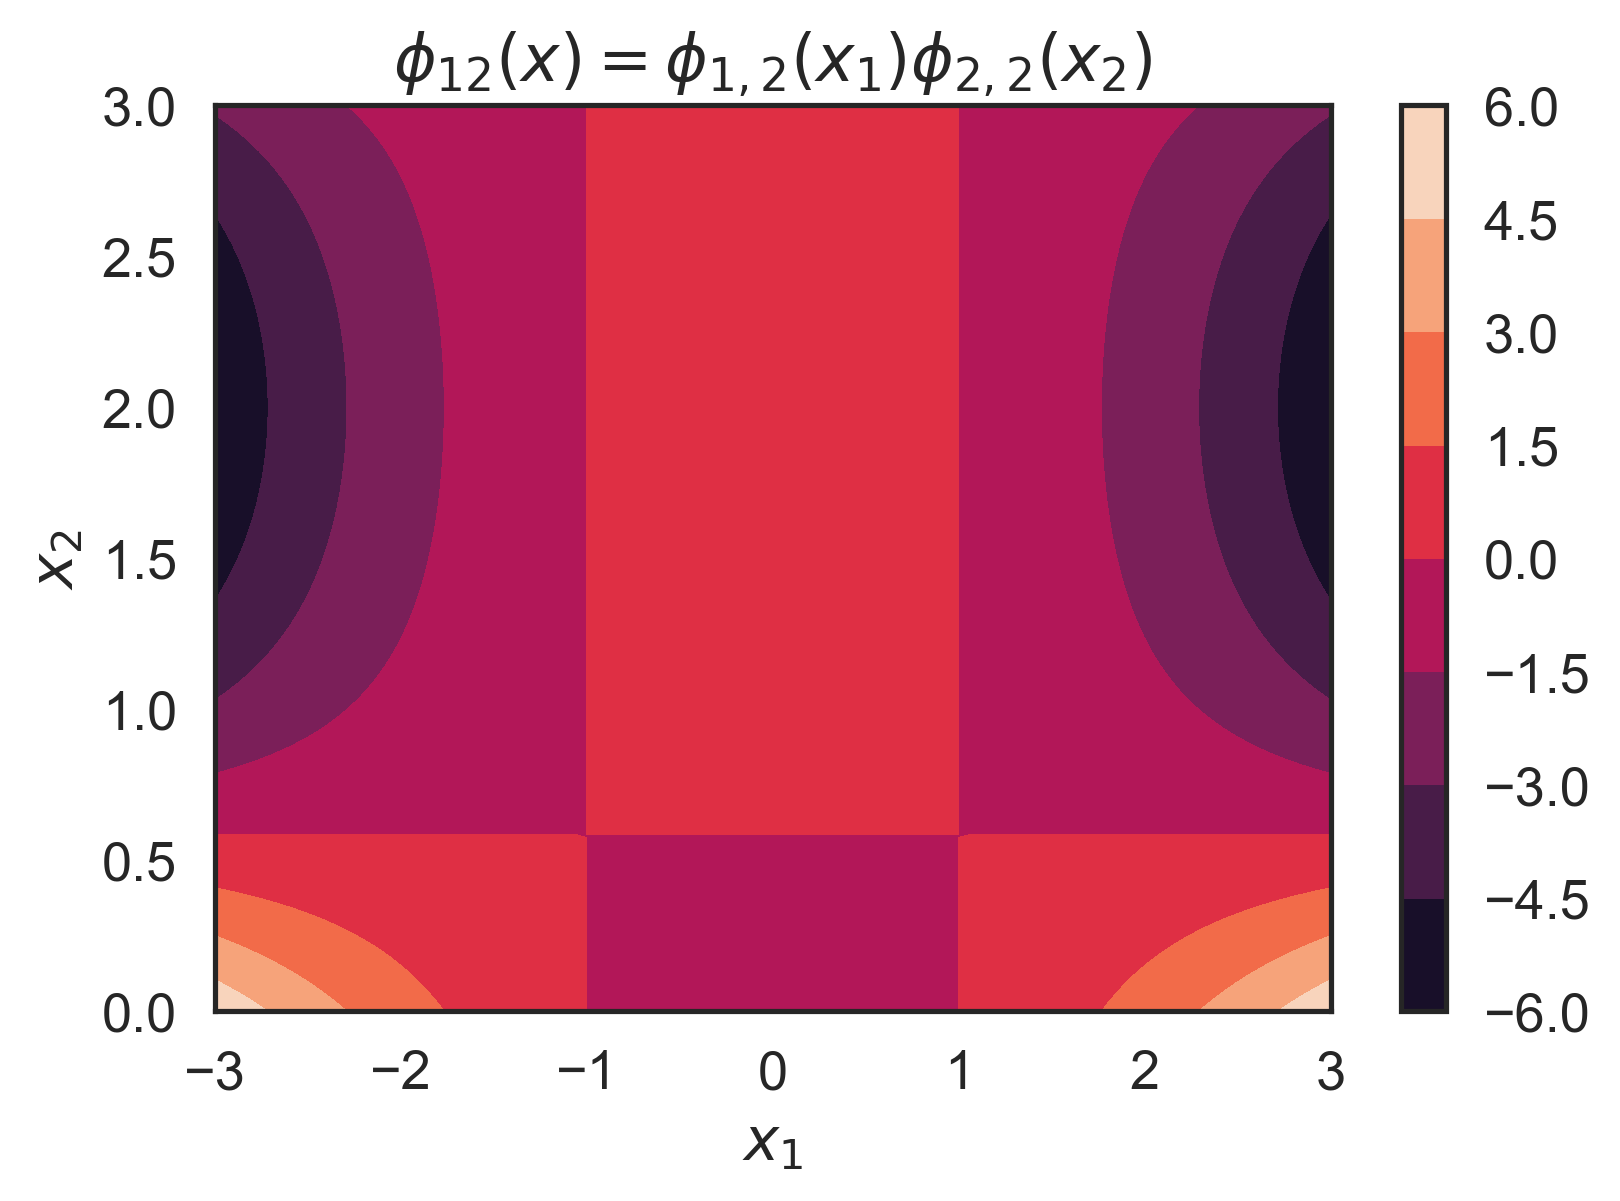

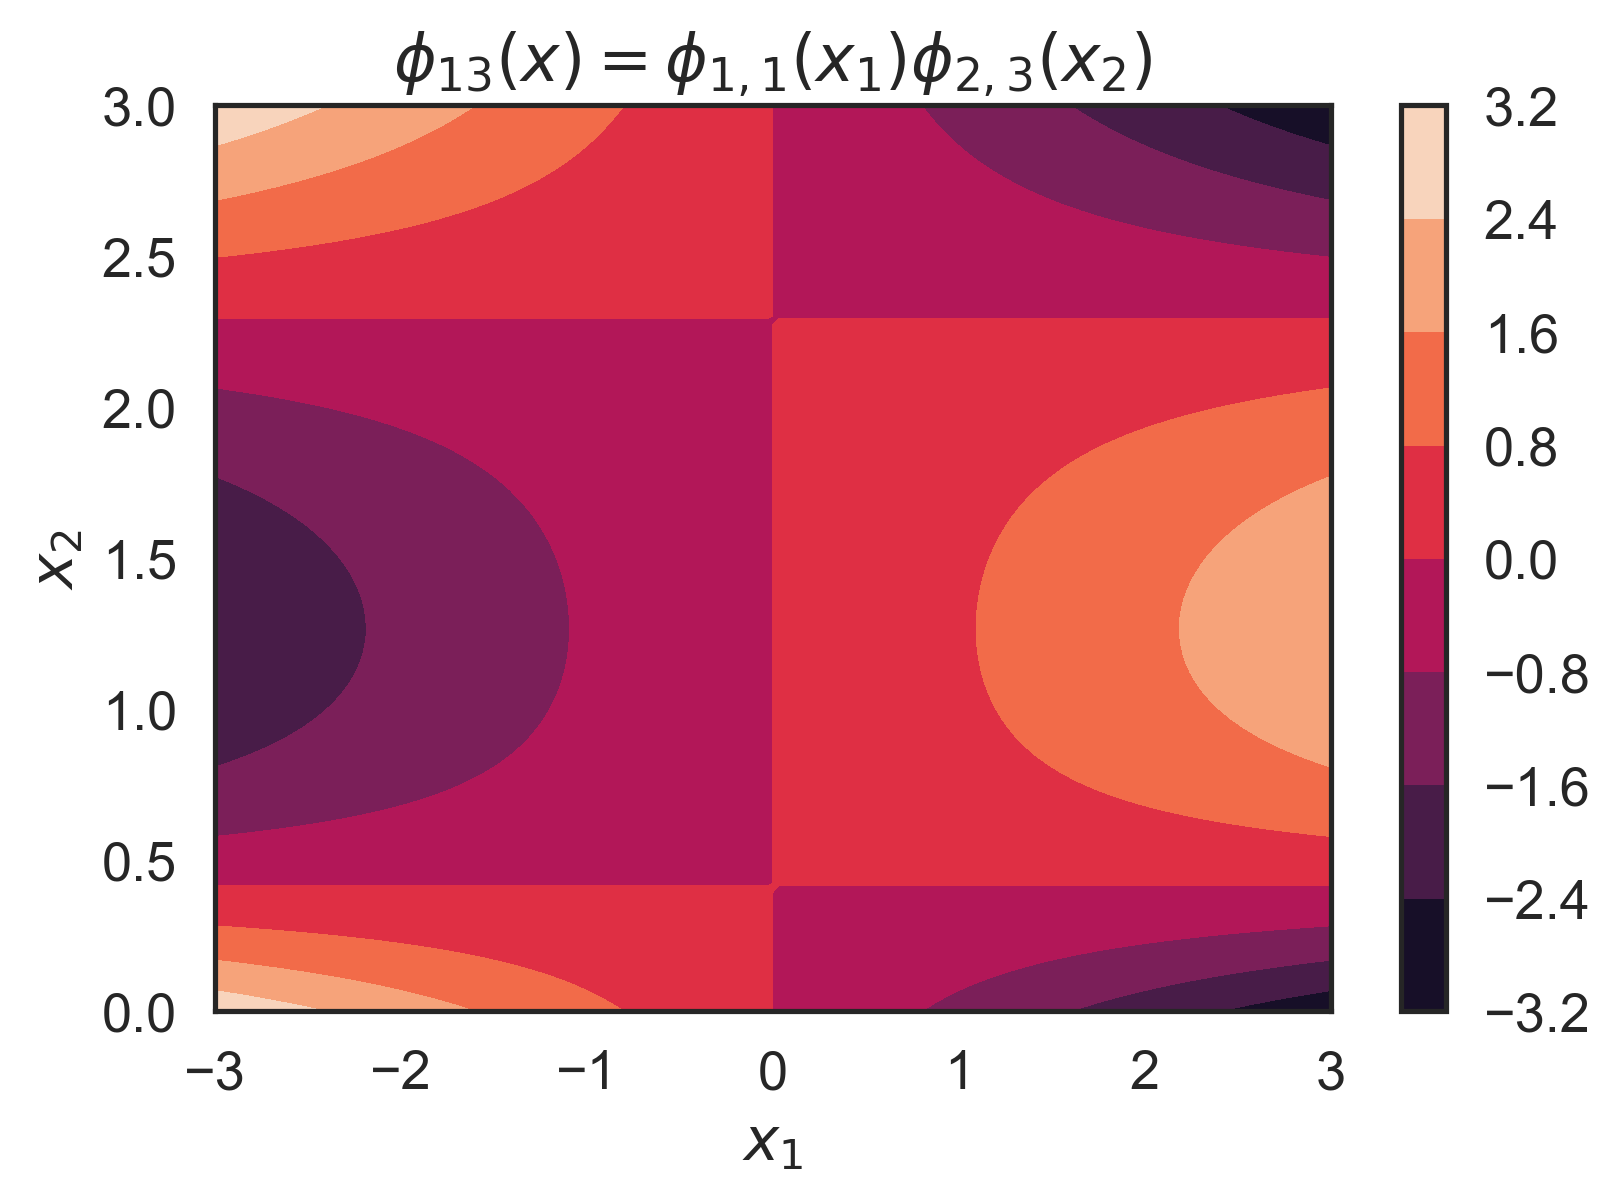

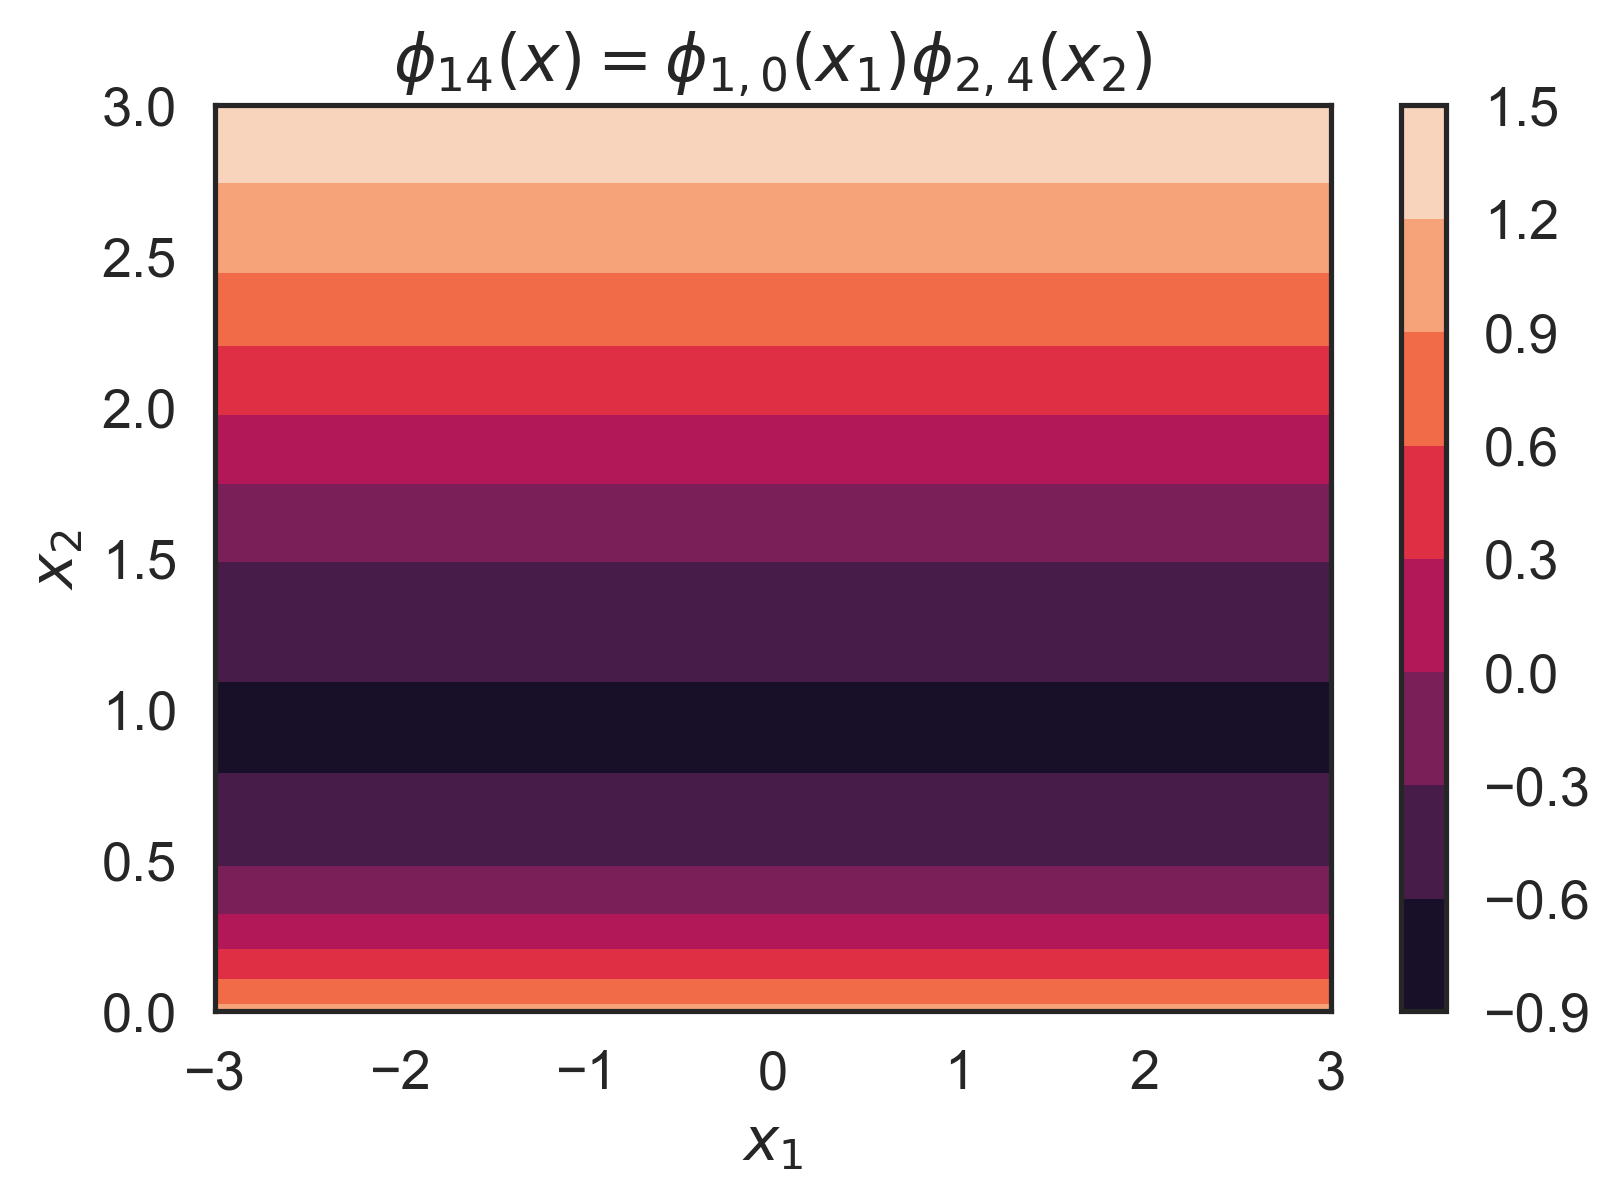

In [10]:
X1 = st.norm()
X2 = st.expon()

# The maximum polynomial degree you want
degree = 4
# Construct the orthogonal polynomials - See documentation for more ways to do create
# multi-dimensional polynomials
Phi_set = orthpol.ProductBasis((X1, X2), degree=degree)

# Let's visualize them
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(0., 3, 100)
Xg1, Xg2 = np.meshgrid(x1, x2)
Xg_flat = np.hstack([Xg1.flatten()[:, None], Xg2.flatten()[:, None]])
phi_g_flat = Phi_set(Xg_flat)

for i in range(Phi_set.num_output):
    fig, ax = plt.subplots()
    c = ax.contourf(Xg1, Xg2, phi_g_flat[:, i].reshape(Xg1.shape))
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('$\phi_{%d}(x) = \phi_{1,%d}(x_1)\phi_{2,%d}(x_2)$' % (
            i, Phi_set.terms[i][0], Phi_set.terms[i][1]))
    plt.colorbar(c)

#### Questions

+ Generate and plot the first few orthogonal polynomials for a random vector with a Normal and a Beta component.

+ Generate and plot the first few orthog

## What is the Connection to Uncertainty Propagation
Let $X$ be a random vector with pdf $p(x)$ and assume that we have constructed orthonormal polynomials $\phi_1 = 1,\phi_2,\phi_3,\dots$.
Let $f\in\mathcal{F}_d$ be your physical model and think of the model output as a random variable $Y=f(X)$.
Assume that we have (somehow) found the coefficients $c_1,c_2,\dots$ in the expansion:
$$
f = \sum_{i=1}^\infty c_i \phi_i.
$$

Now notice that the mean of $Y$ is:
$$
\mathbb{E}[Y] = \mathbb{E}_p[f(X)] = \mathbb{E}_p[f(X) \cdot 1] = \langle f, \phi_1\rangle = c_1.
$$
That is:
$$
\mathbb{E}_p[f(X)] = \langle f, \phi_1\rangle = c_1.
$$
And in words: "The first coefficient gives the mean of the function."

For the variance, we will use the common formula:
$$
\mathbb{V}[Y] = \mathbb{E}[Y^2] - \left\{\mathbb{E}[Y]\right\}^2.
$$
We already have the second term.
Let's do the first:
$$
\mathbb{E}[Y^2] = \mathbb{E}_p[f^2(X)] = \parallel f\parallel^2 = \sum_{i=1}^\infty c_i^2.
$$
Combining everything, we get:
$$
\mathbb{V}_p[f(X)] = \sum_{i=2}^\infty c_i^2.
$$
In words: "The square sum of all the coefficients except the first one gives the variance."

Thinking like this, you can derive approximation formulas for pretty much any statistic of interest.

## Intrusive Uncertainty Propagation Methods: Dynamical Systems

Let $X$ be a random vector with probability density $p(x)$.
Let $\phi_1,\phi_2,\dots$ be an orthonormal basis with respect to $p(x)$.
Consider the stochastic dynamical system:
Consider the $m$-dimensional dynamical system:
$$
\frac{dy}{dt} = g(y;X),
$$
with initial conditions
$$
y(0) = y_0(X).
$$

Assume that the solution $y(t;x)$ is square integrable.
Then, at a given timestep $t$, we take the solution and we expand it in the polynomial basis:
$$
y(t;x) = \sum_{i=1}^\infty c_i(t)\phi_i(x).
$$
Note that the coefficients are functions of time.
According to our discussion above, if you find these $c_i(t)$'s, the expected value of the dynamical system will be:
$$
\mathbb{E}[y(t;X)] = c_1(t),
$$
and the variance will be:
$$
\mathbb{V}[y(t;X)] = \sum_{i=2}^\infty c_i^2(t).
$$

### Derivation of the Dynamical System for the Polynomial Coefficients
We will derive a dynamical system that the coefficients must satisfy.
At the initial conditions we have:
$$
y(0;x) = y_0(x)\Rightarrow \sum_{i=1}^\infty c_i(0)\phi_i(x) = y_0(x),
$$
so we get that:
$$
c_i(0) = \langle \phi_i, y_0\rangle.
$$

Now, take the derivative of $y(t;x)$ with respect to $t$:
$$
\frac{dy}{dt} = \sum_{i=1}^\infty \frac{dc_i}{dt}\phi_i(x).
$$
This looks good, but notice that $\frac{dy}{dt} = g(y;x)$ is also a function of $y(t; x)$.
We must think of $g(y;x)$ as a function of $x$ with a fixed $y$.
Then we get:
$$
\frac{dc_i}{dt} = \left\langle \phi_i, g\left(\sum_{j=1}^\infty c_j\phi_j, \cdot\right)\right\rangle.
$$

Thus, the dynamical systme that we need to solve to find the coefficents at any time is the following:
$$
\frac{dc_i}{dt} = \left\langle \phi_i, g\left(\sum_{j=1}^\infty c_j\phi_j, \cdot\right)\right\rangle,
$$
with initial conditions:
$$
c_i(0) = \langle \phi_i, y_0\rangle,
$$
for $i=1,2,\dots$ (in practice, we truncate at a given order).


### Example 6: Dynamical System with Uncertain Parameters
Take the random vector:
$$
X = (X_1, X_2),
$$
and assume that the components are independent Gaussian:
$$
X_i \sim \mathcal{N}(\mu_i, \sigma_i^2).
$$
So, for the full random vector we have a mean:
$$
\mu = (\mu_1, \mu_2),
$$
and a covariance matrix:
$$
\Sigma = \operatorname{diag}(\sigma_1^2,\sigma_2^2).
$$

Consider the ODE:
  \begin{align*}
    &\dot{y} = \frac{d y(t)}{dt} =-X_1y(t) \equiv g(y,X),\\
    &\qquad y(0) = X_2 \equiv y_0(X).
  \end{align*}

Let's see if we can carry out the inner produces that are required for setting up the dynamical system for the polynomial coefficients:
$$
c_i(0) = \langle \phi_i, y_0\rangle = \langle \phi_i, x_2\rangle.
$$

We should be able to do this numerically with some simple quadrature rule $\{(w_q,x_q)\}_{q=1}^{N_q}$:
$$
c_{i0} = \langle \phi_i, y_0\rangle \approx \sum_{q=1}^{N_q}w_q \phi_i(x_q)x_{q,2}.
$$

The other integrals that we need are:
$$
\langle \phi_i, g\rangle = \langle \phi_i, -x_1 \sum_{j=1}^\infty c_j \phi_j\rangle = -\sum_{j=1}^\infty c_j \langle \phi_i, x_1\phi_j\rangle.
$$
We can approximate all the integrals inside the summation by:
$$
A_{ij} = \langle \phi_i, x_1\phi_j\rangle \approx \sum_{q=1}^{N_q}w_q\phi_i(x_q)x_{q1}\phi_j(x_q). 
$$

With these definitions, the dynamical system that we need to solve is:
$$
\frac{dc_i}{dt} = -\sum_{j=1}^\infty c_j A_{ij},
$$
with initial conditions:
$$
c_i(0) = c_{i0},
$$
for $i=1,2,\dots$ (we will truncate).

Let's do it.

In [28]:
# SOLUTION WITH ORTHOGONAL POLYNOMIALS

# Construct the random variables - It is not very stable to work with the original 
# random varibales (too little uncertainty).
# So, we work with scaled versions.
mu1 = 0.05; sigma1 = 0.01
sX1 = st.norm()
mu2 = 8; sigma2 = 0.01
sX2 = st.norm()
sX = (sX1, sX2)
mu = np.array([mu1, mu2])
Sigma = np.diag([sigma1 ** 2, sigma2 ** 2])

# Construct the orthonormal polynomials
degree = 1
Phi_set = orthpol.ProductBasis((sX1, sX2), degree=degree, ncap=1000)
Phi_set.polynomials[0].normalize()
Phi_set.polynomials[1].normalize()
# Get a quadrature rule - we will talk about the quadrature rules in Lecture 17.
sXq = np.random.randn(1000000, 2)
w = np.ones((sXq.shape[0],)) / sXq.shape[0]
Xq = np.ndarray(sXq.shape)
Xq[:, 0] = sXq[:, 0] * sigma1 + mu1
Xq[:, 1] = sXq[:, 1] * sigma2 + mu2

# Evaluate the integrals needed for defining the dynamical system
# Evaluate the orthogonal polynomials on the quadrature points
phi_q = Phi_set(sXq)
c0 = np.einsum('q,q,qj->j', w, Xq[:, 1], phi_q)
# Evaluate the integrals giving rise to the matrix A
A = np.einsum('q,q,qi,qj->ij', w, Xq[:, 0], phi_q, phi_q)

# Define the dynamical system
pc_rhs = lambda c, t: -np.dot(A, c)

# Solve the system
t = np.linspace(0, 100, 500)
c = scipy.integrate.odeint(pc_rhs, c0, t)

# Extract the mean
y_pc_m = c[:, 0]

# Extract the variance
y_pc_v = np.sum(c[:, 1:] ** 2, axis=1)

In [29]:
# SOLUTION WITH SAMPLING (FOR COMPARISON)
import scipy.integrate

class Ex1Solver(object):
    """
    An object that can solver the afforementioned ODE problem.
    It will work just like a multivariate function.
    """
    
    def __init__(self, nt=100, T=5):
        """
        This is the initializer of the class.
        
        Arguments:
            nt - The number of timesteps.
            T  - The final time.
        """
        self.nt = nt
        self.T = T
        self.t = np.linspace(0, T, nt) # The timesteps on which we will get the solution
        # The following are not essential, but they are convenient
        self.num_input = 2             # The number of inputs the class accepts
        self.num_output = nt           # The number of outputs the class returns
    
    def __call__(self, x):
        """
        This special class method emulates a function call.
        
        Arguments:
            x - A 1D numpy array with 2 elements. This represents the stochastic input x = (x1, x2).
        """
        # The dynamics of the adjoint z = y, dy/dx1, dy/dx2
        def g(z, t, x):
            return -x[0] * z[0], -x[0] * z[1] - z[0], -x[0] * z[2]
        # The initial condition
        y0 = (x[1], 0, 1)
        # We are ready to solve the ODE
        y = scipy.integrate.odeint(g, y0, self.t, args=(x,))
        return y
    
import design
num_lhs = 10000
X_lhs = design.latin_center(num_lhs, 2) # These are uniformly distributed - Turn them to standard normal
X_samples = mu + np.dot(st.norm.ppf(X_lhs), np.sqrt(Sigma))
solver = Ex1Solver(nt=500, T=100)
s = 0.
s2 = 0.
for x in X_samples:
    y = solver(x)[:, 0]
    s += y
    s2 += y ** 2
y_mu_lhs = s / num_lhs
y_var_lhs = s2 / num_lhs - y_mu_lhs ** 2

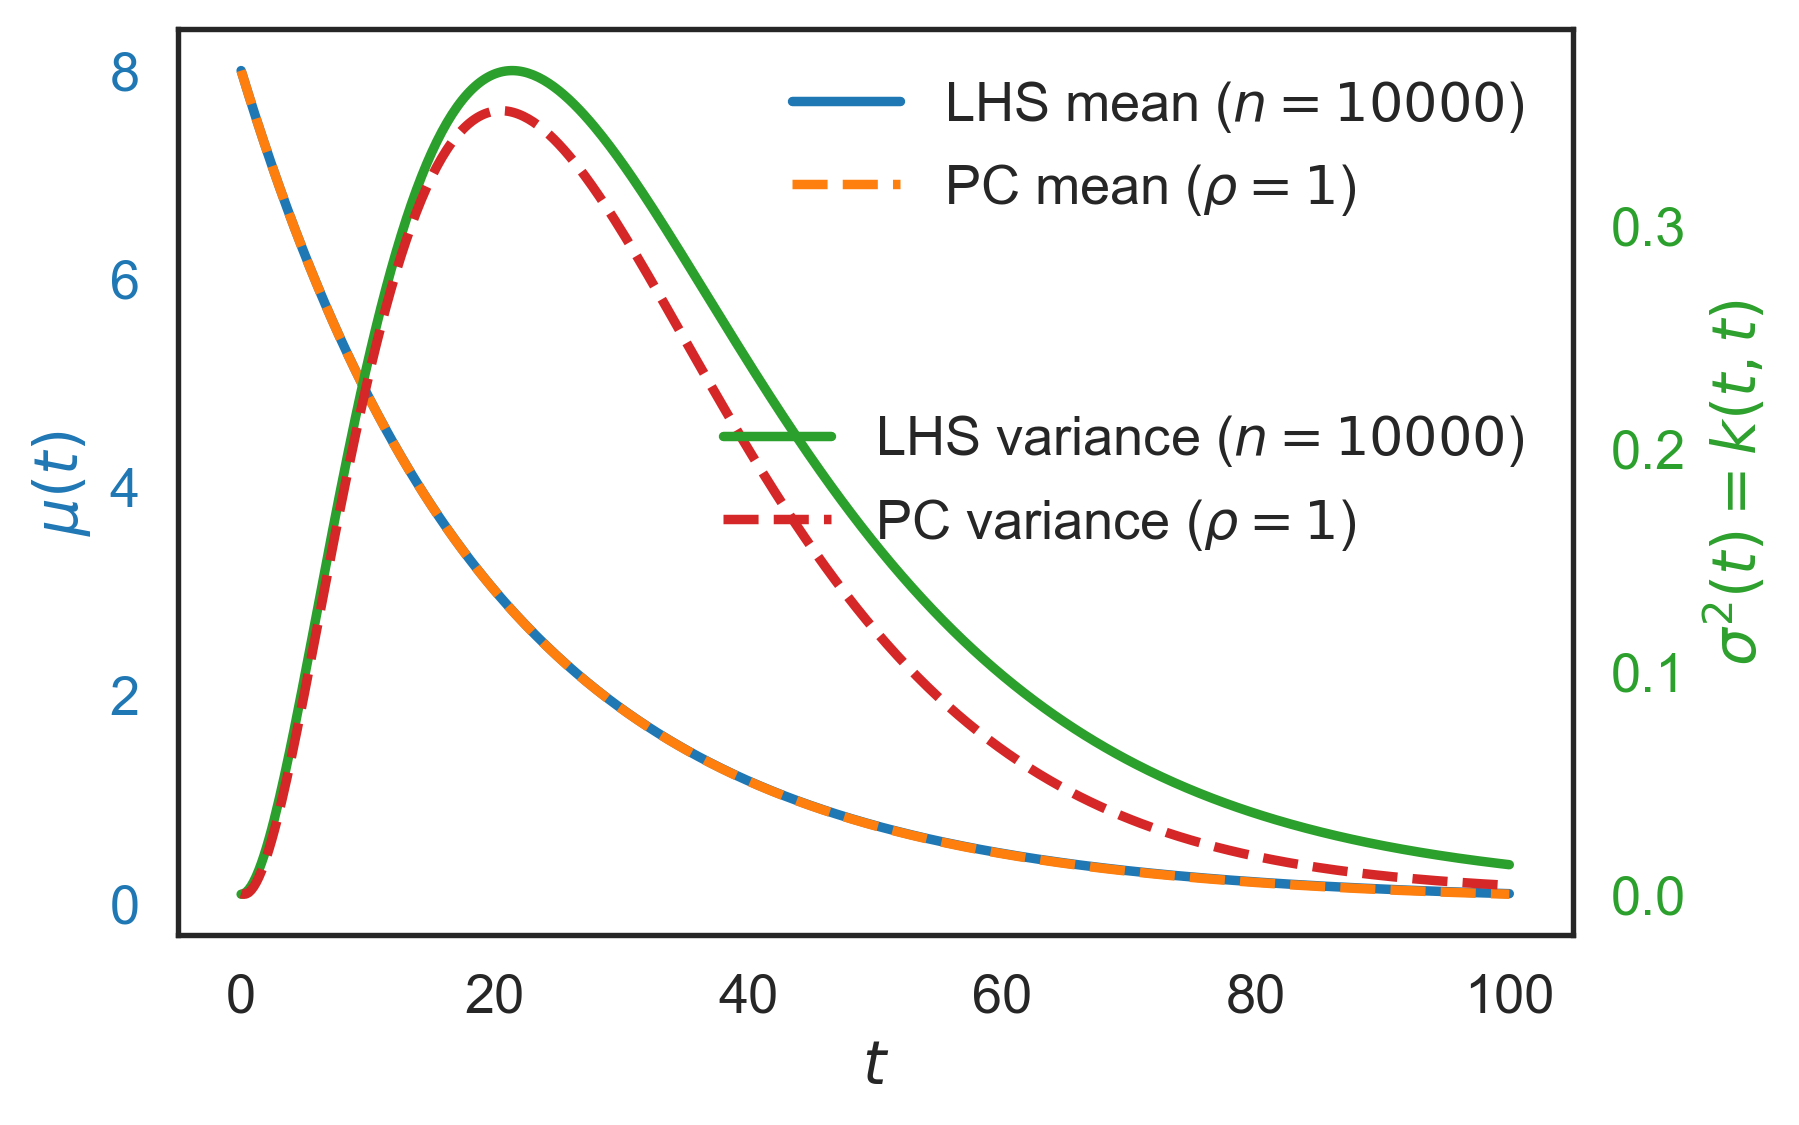

In [30]:
# Make the figure
fig1, ax1 = plt.subplots()

# Plot the mean and compare to LHS
ax1.plot(solver.t, y_mu_lhs, color=sns.color_palette()[0], label='LHS mean ($n=%d$)' % num_lhs)
ax1.plot(t, y_pc_m, '--', color=sns.color_palette()[1], label=r'PC mean ($\rho=%d$)' % degree)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$\mu(t)$', color=sns.color_palette()[0])
ax1.tick_params('y', colors=sns.color_palette()[0])
plt.legend(loc='upper right')

# Plot variance and compare to LHS
ax2 = ax1.twinx()
ax2.plot(solver.t, y_var_lhs, color=sns.color_palette()[2], label='LHS variance ($n=%d$)' % (num_lhs))
ax2.plot(solver.t, y_pc_v, '--', color=sns.color_palette()[3], label=r'PC variance ($\rho=%d$)' % degree)
ax2.set_ylabel('$\sigma^2(t) = k(t, t)$', color=sns.color_palette()[2])
ax2.tick_params('y', colors=sns.color_palette()[2])
plt.legend(loc='center right');

Text(0,0.5,u'$y(t)$')

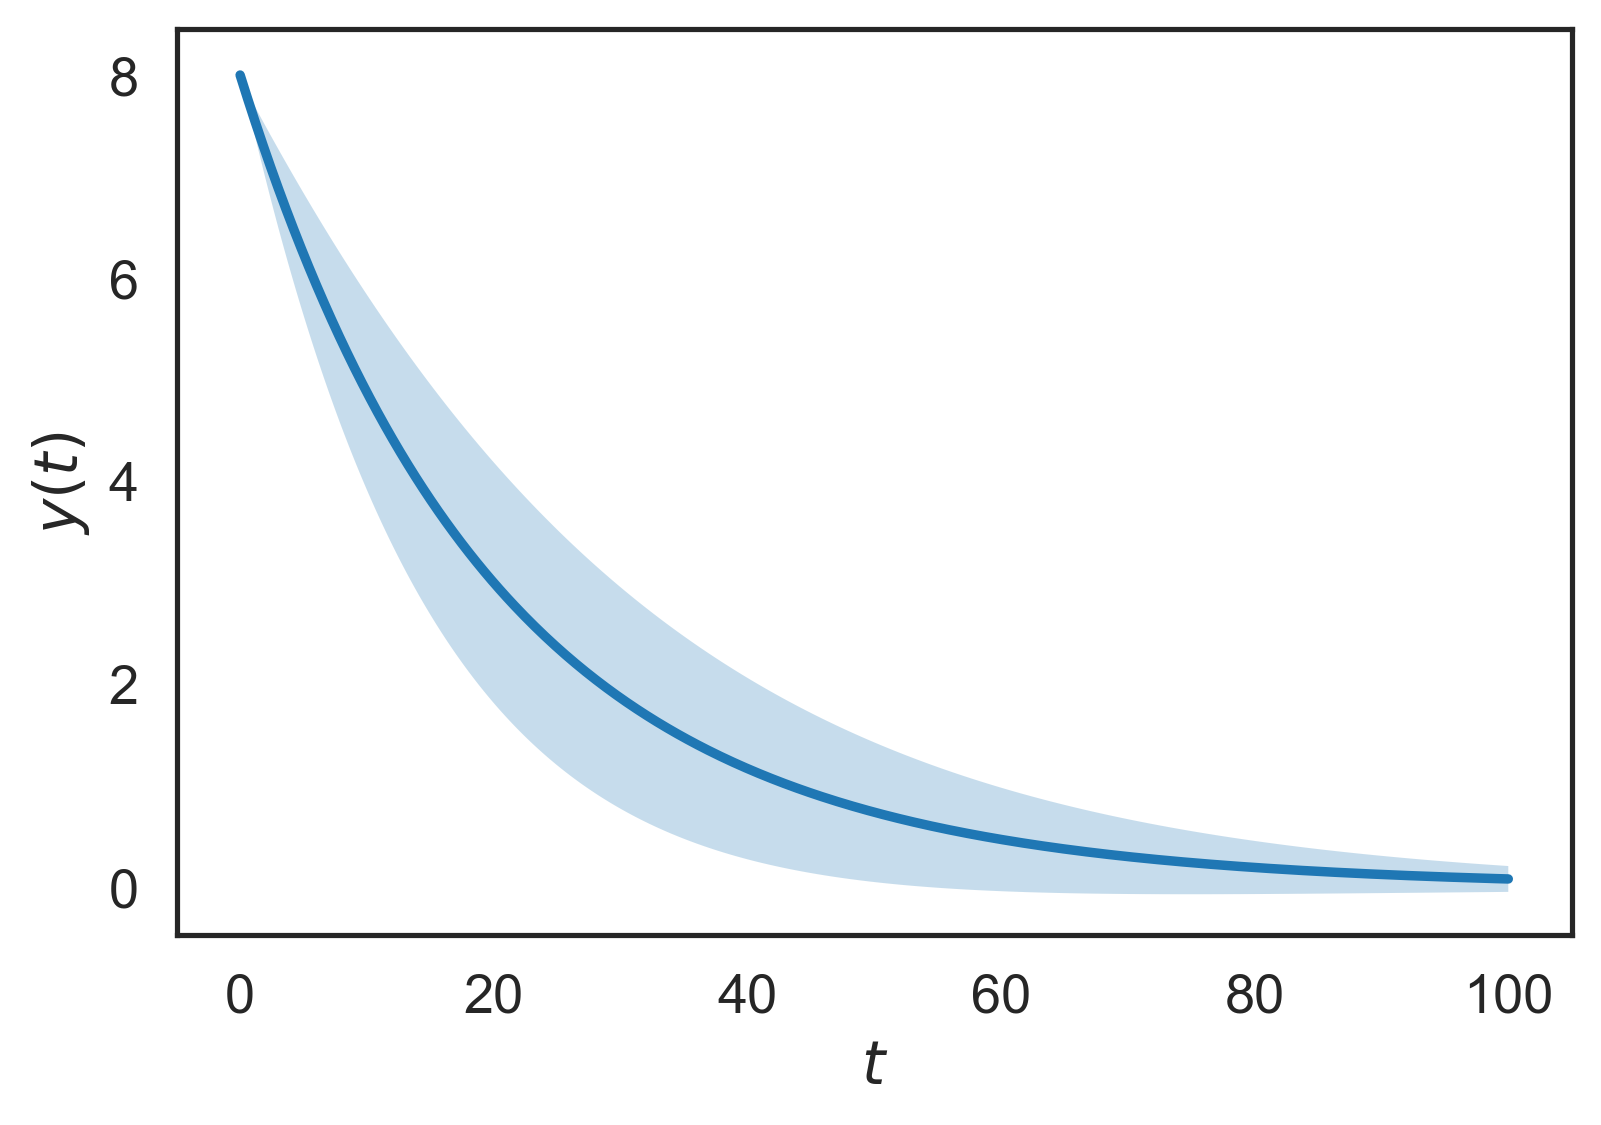

In [31]:
# Let's do 95% intervals
s = np.sqrt(y_pc_v)
l = y_pc_m - 2 * s
u = y_pc_m + 2 * s
fig, ax = plt.subplots()
ax.plot(t, y_pc_m)
ax.fill_between(t, l, u, alpha=0.25)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

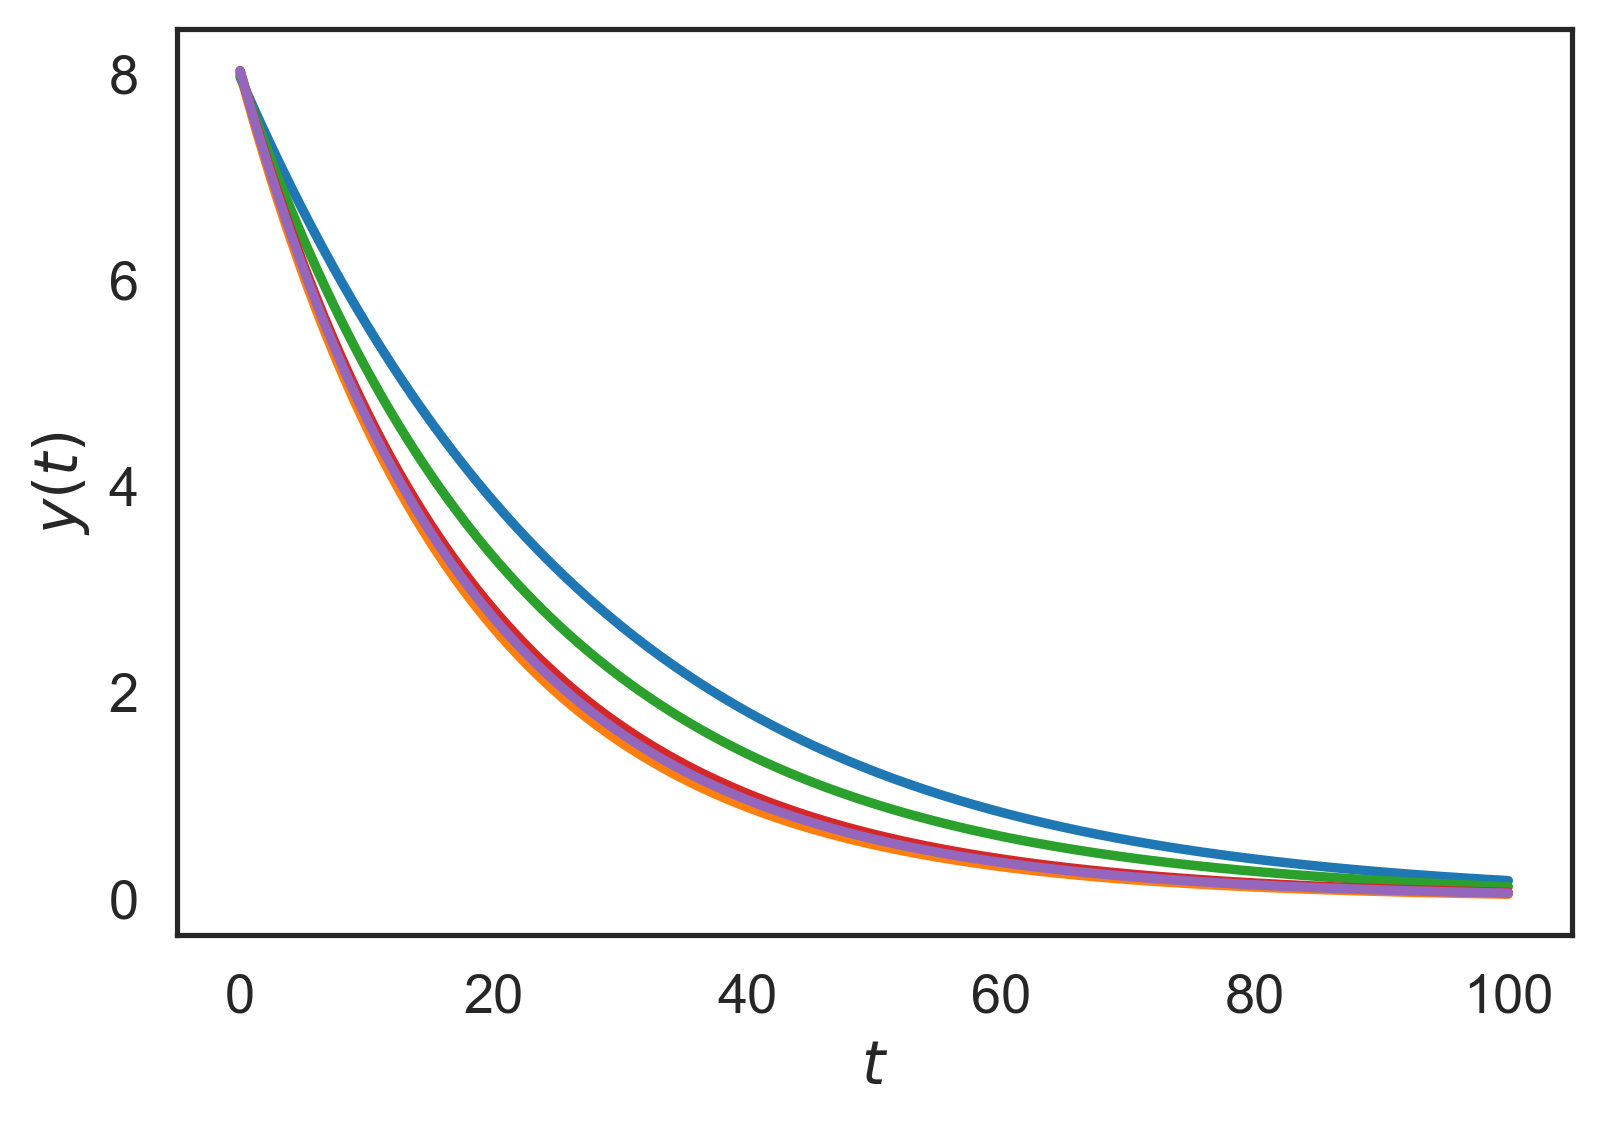

In [32]:
# Let's take some sample paths
fig, ax = plt.subplots()
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')
for _ in range(5):
    s_x_s = np.random.randn(2)
    y_s = np.dot(c, Phi_set(s_x_s[None, :]).T)
    ax.plot(t, y_s)

#### Questions
+ Repeat the analysis with higher polynomial degrees. What $\rho$ do you need to get convergent results?

+ Modify the code above so that you solve the problem with $X_1$ and $X_2$ that are Log-Normally distributed (choose your own mean and variance).